In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pymannkendall as mk
from functools import reduce
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import general_functions_US_Neon as gf
import data_loader_US_Neon as dl

Processed file: C:\Users\adeba\OneDrive\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\thiessen_updated\Thiessen_Polygons_100yrs.csv
            ID          Area
0  USC00049452   8650.260255
1  USC00047902   6831.383561
2  USC00044957   4970.534591
3  USC00046730  15228.861848
4  USC00049473  10053.527381
Cleaned data 
Processed file: C:\Users\adeba\OneDrive\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\thiessen_updated\Thiessen_Polygons_50yrs.csv
            ID         Area
0  USC00046719  1944.686212
1  USC00049152   297.120523
2  USW00003122   826.806422
3  USC00047888  3234.100604
4  USC00040741  6303.385149
Cleaned data 
Processed file: C:\Users\adeba\OneDrive\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\thiessen_updated\Thiessen_Polygons_30yrs.csv
            ID         Area
0  USC00041758   981.812151
1  USC00043914  1954.593553
2  USC00046175   833.606575
3  USC00040192  3199.228693
4  USC00044211  3684.754910
Cleaned data 
Processed file: C:\Users\ad

In [ ]:
#!pip install xlsxwriter

!pip install geopandas pymannkendall statsmodels


In [3]:
df_yearly= dl.df_yearly.copy()
df_monthly = dl.df_monthly.copy()
gdf_shape = dl.US.copy()
df_daily = dl.df_daily.copy()

In [4]:
df_yearly_needed = df_yearly[["ID","Lat","Lon","domainName"]].drop_duplicates()

In [5]:
area_100=dl.thies_dfs[0]
total_area = area_100.Area.sum()

In [7]:
area_100

,ID,Area
0,USC00049452,8650.260255
1,USC00047902,6831.383561
2,USC00044957,4970.534591
3,USC00046730,15228.861848
4,USC00049473,10053.527381
...,...,...
858,USC00194105,11345.320237
859,USC00431580,6715.232116
860,USC00272999,4746.355375
861,USC00270690,10281.992507


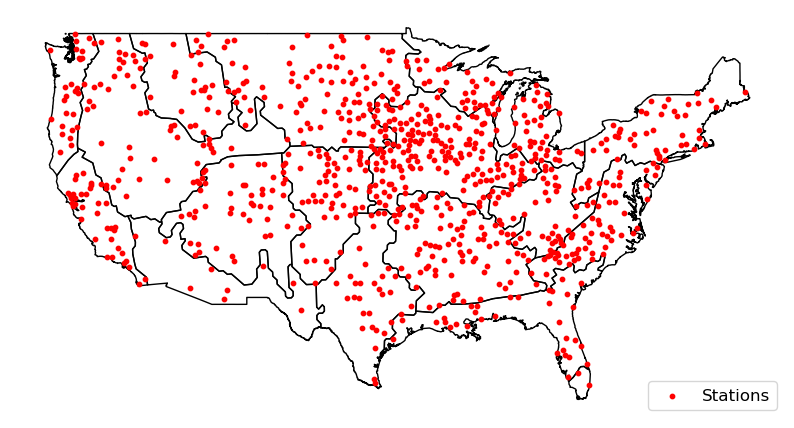

In [8]:
import matplotlib.pyplot as plt

# Select the needed columns and remove duplicates
df_yearly_needed = df_yearly[["ID", "Lat", "Lon", "domainName"]].drop_duplicates()

# Create a figure and set the figsize
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the shapefile
gdf_shape.plot(ax=ax, color='none', edgecolor="black")

# Plot the stations (longitude = x, latitude = y), and assign a label for legend
ax.scatter(df_yearly_needed["Lon"], df_yearly_needed["Lat"], color='red', s=10, label='Stations')

# Remove the axis
ax.set_axis_off()

# Add legend
ax.legend(loc='lower right', fontsize=12)  # You can adjust location and font size as you like

# Save the figure
plt.savefig("station.jpeg", dpi=300, bbox_inches='tight')

# Show the figure
plt.show()


In [9]:
df_yearly

,ID,YEAR,Lat,Lon,STATE,S_year,domainName,PRCP,TMAX,TMIN,PET_thornwaite,spei1,spei3,spei6,spei12,AI
0,USC00011694,1924,32.8158,-86.6044,AL,1924,Ozarks Complex,1466.0,23.433873,10.412778,846.979913,0.001398,-0.180419,-0.118583,0.027338,1.730856
1,USC00011694,1925,32.8158,-86.6044,AL,1924,Ozarks Complex,1225.0,25.007585,11.220741,919.128684,-0.341093,-0.371955,-0.136577,-0.046326,1.332784
2,USC00011694,1926,32.8158,-86.6044,AL,1924,Ozarks Complex,1600.8,23.538086,10.462645,860.749260,0.217070,-0.076862,-0.237494,-0.063782,1.859775
3,USC00011694,1927,32.8158,-86.6044,AL,1924,Ozarks Complex,1107.9,25.502519,11.701780,966.420938,-0.424142,-0.241929,-0.325932,-0.128300,1.146395
4,USC00011694,1928,32.8158,-86.6044,AL,1924,Ozarks Complex,1261.2,23.326303,10.117663,840.257520,-0.165275,-0.120014,-0.314696,-0.144120,1.500968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86095,USW00094967,2019,46.8997,-95.0669,MN,1924,Northern Plains,748.9,8.901874,-2.597975,609.498732,0.240374,-0.145247,-0.262586,-0.209485,1.228715
86096,USW00094967,2020,46.8997,-95.0669,MN,1924,Northern Plains,528.9,10.926977,-1.392647,604.741653,-0.097469,0.078288,-0.211242,-0.248903,0.874588
86097,USW00094967,2021,46.8997,-95.0669,MN,1924,Northern Plains,455.5,12.320000,-0.132146,690.789807,-0.537911,-0.193326,-0.278203,-0.305429,0.659390
86098,USW00094967,2022,46.8997,-95.0669,MN,1924,Northern Plains,503.8,9.540976,-2.499744,630.205587,-0.201682,-0.412094,-0.293423,-0.313713,0.799422


In [10]:
df_yearly_100years_avg =df_yearly.groupby(["ID"])[["PRCP","TMAX","TMIN","AI"]].mean().reset_index()


df_yearly_climate1= df_yearly[(df_yearly["YEAR"]>= 1964) &(df_yearly["YEAR"]<= 1993)]
df_yearly_climate2 = df_yearly[(df_yearly["YEAR"]>= 1994) &(df_yearly["YEAR"]<= 2023)]

df_yearly_climate1_avg = df_yearly_climate1.groupby(["ID","S_year"])[["PRCP","TMAX","TMIN","AI"]].mean().reset_index()
df_yearly_climate2_avg = df_yearly_climate2.groupby(["ID","S_year"])[["PRCP","TMAX","TMIN","AI"]].mean().reset_index()

# Merge datasets to compute differences
df_climate_diff = df_yearly_climate1_avg.merge(df_yearly_climate2_avg, on=["ID"], suffixes=("_1964_1993", "_1994_2023"))

# Compute differences (New Climate Period - Old Climate Period)
df_climate_diff["PRCP_DIFF"] = df_climate_diff["PRCP_1994_2023"] - df_climate_diff["PRCP_1964_1993"]
df_climate_diff["TMAX_DIFF"] = df_climate_diff["TMAX_1994_2023"] - df_climate_diff["TMAX_1964_1993"]
df_climate_diff["TMIN_DIFF"] = df_climate_diff["TMIN_1994_2023"] - df_climate_diff["TMIN_1964_1993"]
df_climate_diff["AI_DIFF"] = df_climate_diff["AI_1994_2023"] - df_climate_diff["AI_1964_1993"]

df_climate_diff= df_climate_diff[["ID","PRCP_DIFF","TMAX_DIFF","TMIN_DIFF","AI_DIFF"]]

In [11]:
area_100

,ID,Area
0,USC00049452,8650.260255
1,USC00047902,6831.383561
2,USC00044957,4970.534591
3,USC00046730,15228.861848
4,USC00049473,10053.527381
...,...,...
858,USC00194105,11345.320237
859,USC00431580,6715.232116
860,USC00272999,4746.355375
861,USC00270690,10281.992507


In [12]:
df_climate_diff_update = df_climate_diff.merge(area_100, on= ["ID"], how="left")

In [13]:
df_climate_diff_update = df_climate_diff_update.merge(df_yearly_needed, on=["ID"], how="left")

In [14]:
df_climate_diff_update

,ID,PRCP_DIFF,TMAX_DIFF,TMIN_DIFF,AI_DIFF,Area,Lat,Lon,domainName
0,USC00011694,6.261667,0.110299,0.581039,-0.044274,9014.522689,32.8158,-86.6044,Ozarks Complex
1,USC00012813,84.653333,0.794830,-0.364626,0.051038,17574.065305,30.5467,-87.8808,Southeast
2,USC00013511,-102.476111,-0.055023,1.264700,-0.190435,17631.352892,32.6922,-87.5761,Ozarks Complex
3,USC00013519,71.585000,0.018650,-0.311491,0.105523,15844.156183,31.7900,-86.6086,Southeast
4,USC00017157,24.849444,1.013444,1.837884,-0.185778,15101.696107,34.1736,-86.8133,Ozarks Complex
...,...,...,...,...,...,...,...,...,...
856,USW00093992,-15.946667,0.524323,0.478947,-0.078380,14879.503705,33.2208,-92.8142,Ozarks Complex
857,USW00094728,51.803333,0.245518,0.800508,0.013546,4623.610968,40.7789,-73.9692,Northeast
858,USW00094849,12.313333,0.686097,0.940116,-0.048142,3544.012100,45.0717,-83.5644,Great Lakes
859,USW00094957,-67.211667,0.120673,0.214571,-0.115345,3022.957845,40.0792,-95.5892,Prairie Peninsula


In [15]:
df_climate_diff_update_group = df_climate_diff_update.groupby("domainName")[["AI_DIFF"]].mean().reset_index()

In [16]:
df_climate_diff_update_group

,domainName,AI_DIFF
0,Appalachians / Cumberland Plateau,0.033482
1,Atlantic Neotropical,0.001133
2,Central Plains,-0.006358
3,Desert Southwest,-0.057802
4,Great Basin,-0.012324
5,Great Lakes,0.033449
6,Mid Atlantic,-0.018006
7,Northeast,0.076796
8,Northern Plains,0.039552
9,Northern Rockies,-0.018873


In [17]:
# Calculate total area
#total_area = df_climate_diff_update["Area"].sum()

# Calculate area where AI_DIFF < 0
negative_ai_area = df_climate_diff_update[df_climate_diff_update["AI_DIFF"] < 0]["Area"].sum()

# Calculate percentage
percentage_negative_ai = (negative_ai_area / total_area) * 100

# Display result
percentage_negative_ai


np.float64(53.60105167047519)

In [18]:
df_yearly_climate2_avg

,ID,S_year,PRCP,TMAX,TMIN,AI
0,USC00011694,1924,1480.230000,23.584534,10.585963,1.736713
1,USC00012813,1924,1746.618333,25.711222,13.435989,1.796906
2,USC00013511,1924,1304.292222,24.375797,12.473012,1.409185
3,USC00013519,1924,1498.260000,24.937566,11.383743,1.695511
4,USC00017157,1924,1502.945000,23.135077,9.886567,1.773941
...,...,...,...,...,...,...
856,USW00093992,1924,1307.860000,24.239849,11.444491,1.447026
857,USW00094728,1924,1285.710000,17.181542,9.240233,1.747433
858,USW00094849,1924,752.820000,12.484098,1.193499,1.264403
859,USW00094957,1924,829.063333,18.178179,5.423168,1.164289


In [19]:
df_yearly_needed

,ID,Lat,Lon,domainName
0,USC00011694,32.8158,-86.6044,Ozarks Complex
100,USC00012813,30.5467,-87.8808,Southeast
200,USC00013511,32.6922,-87.5761,Ozarks Complex
300,USC00013519,31.7900,-86.6086,Southeast
400,USC00017157,34.1736,-86.8133,Ozarks Complex
...,...,...,...,...
85600,USW00093992,33.2208,-92.8142,Ozarks Complex
85700,USW00094728,40.7789,-73.9692,Northeast
85800,USW00094849,45.0717,-83.5644,Great Lakes
85900,USW00094957,40.0792,-95.5892,Prairie Peninsula


In [20]:
df_yearly_climate2_avg_065 = df_yearly_climate2_avg[df_yearly_climate2_avg["AI"]<=0.65]

In [21]:
area_100

,ID,Area
0,USC00049452,8650.260255
1,USC00047902,6831.383561
2,USC00044957,4970.534591
3,USC00046730,15228.861848
4,USC00049473,10053.527381
...,...,...
858,USC00194105,11345.320237
859,USC00431580,6715.232116
860,USC00272999,4746.355375
861,USC00270690,10281.992507


In [22]:
df_yearly_climate2_avg_065

,ID,S_year,PRCP,TMAX,TMIN,AI
10,USC00020080,1924,169.400833,29.612707,15.922173,0.122793
11,USC00024453,1924,427.758333,21.287660,10.656872,0.517796
12,USC00026796,1924,410.572222,21.485019,4.758309,0.564924
13,USC00027281,1924,393.168333,28.140658,13.144694,0.348160
14,USC00027435,1924,218.409444,21.482912,3.636965,0.307589
...,...,...,...,...,...,...
843,USW00024121,1924,260.970000,17.325940,-0.224636,0.433513
844,USW00024128,1924,216.540000,19.151487,0.588676,0.350214
845,USW00024135,1924,315.568333,12.337074,-3.163939,0.563224
846,USW00024137,1924,250.066667,12.249093,-1.229107,0.447016


In [23]:
df_yearly_needed_temporary = area_100.merge(df_yearly_needed, on="ID", how= "inner")

In [24]:
df_yearly_needed_temporary

,ID,Area,Lat,Lon,domainName
0,USC00049452,8650.260255,35.5892,-119.3519,Pacific Southwest
1,USC00047902,6831.383561,34.4167,-119.6844,Pacific Southwest
2,USC00044957,4970.534591,36.2033,-119.0545,Pacific Southwest
3,USC00046730,15228.861848,35.6278,-120.6856,Pacific Southwest
4,USC00049473,10053.527381,36.9308,-121.7692,Pacific Southwest
...,...,...,...,...,...
856,USC00194105,11345.320237,42.6992,-71.1658,Northeast
857,USC00431580,6715.232116,43.9572,-73.2106,Northeast
858,USC00272999,4746.355375,45.0900,-71.2906,Northeast
859,USC00270690,10281.992507,44.4536,-71.1856,Northeast


In [25]:
df_yearly_needed_temporary_group = df_yearly_needed_temporary.groupby(["domainName"])[["Area"]].sum().reset_index()

In [26]:
df_yearly_needed_temporary_group

,domainName,Area
0,Appalachians / Cumberland Plateau,276553.354242
1,Atlantic Neotropical,26559.347206
2,Central Plains,483920.087338
3,Desert Southwest,455042.105240
4,Great Basin,722162.531294
5,Great Lakes,404800.946505
6,Mid Atlantic,382192.244342
7,Northeast,436113.492747
8,Northern Plains,912071.958615
9,Northern Rockies,296010.437074


In [27]:
df_yearly_climate2_avg_065

,ID,S_year,PRCP,TMAX,TMIN,AI
10,USC00020080,1924,169.400833,29.612707,15.922173,0.122793
11,USC00024453,1924,427.758333,21.287660,10.656872,0.517796
12,USC00026796,1924,410.572222,21.485019,4.758309,0.564924
13,USC00027281,1924,393.168333,28.140658,13.144694,0.348160
14,USC00027435,1924,218.409444,21.482912,3.636965,0.307589
...,...,...,...,...,...,...
843,USW00024121,1924,260.970000,17.325940,-0.224636,0.433513
844,USW00024128,1924,216.540000,19.151487,0.588676,0.350214
845,USW00024135,1924,315.568333,12.337074,-3.163939,0.563224
846,USW00024137,1924,250.066667,12.249093,-1.229107,0.447016


In [28]:
df_yearly_climate2_avg_065 = df_yearly_climate2_avg_065.merge(df_yearly_needed_temporary, on="ID", how= "inner")
df_yearly_climate2_avg_065

,ID,S_year,PRCP,TMAX,TMIN,AI,Area,Lat,Lon,domainName
0,USC00020080,1924,169.400833,29.612707,15.922173,0.122793,47699.384354,32.3697,-112.8600,Desert Southwest
1,USC00024453,1924,427.758333,21.287660,10.656872,0.517796,7503.627306,34.7539,-112.1114,Southern Rockies / Colorado Plateau
2,USC00026796,1924,410.572222,21.485019,4.758309,0.564924,21743.535808,34.5706,-112.4322,Southern Rockies / Colorado Plateau
3,USC00027281,1924,393.168333,28.140658,13.144694,0.348160,30903.579483,33.6489,-111.1089,Desert Southwest
4,USC00027435,1924,218.409444,21.482912,3.636965,0.307589,25738.326023,34.5172,-109.4028,Southern Rockies / Colorado Plateau
...,...,...,...,...,...,...,...,...,...,...
143,USW00024121,1924,260.970000,17.325940,-0.224636,0.433513,37935.384502,40.8239,-115.7864,Great Basin
144,USW00024128,1924,216.540000,19.151487,0.588676,0.350214,14161.915072,40.9017,-117.8081,Great Basin
145,USW00024135,1924,315.568333,12.337074,-3.163939,0.563224,11216.236571,45.9644,-112.5014,Northern Rockies
146,USW00024137,1924,250.066667,12.249093,-1.229107,0.447016,8398.307516,48.6036,-112.3767,Northern Plains


In [29]:
df_yearly_climate2_avg_065_group = df_yearly_climate2_avg_065.groupby(["domainName"])[["Area"]].sum().reset_index()

In [30]:
df_yearly_climate2_avg_065_group = df_yearly_needed_temporary_group.merge(
    df_yearly_climate2_avg_065_group, 
    on="domainName", 
    suffixes=("all", "dryland")
)


In [31]:
df_yearly_climate2_avg_065_group["percent"] =100 * df_yearly_climate2_avg_065_group["Areadryland"]/ df_yearly_climate2_avg_065_group["Areaall"]

In [32]:
df_yearly_climate2_avg_065_group

,domainName,Areaall,Areadryland,percent
0,Central Plains,483920.087338,247678.944801,51.181786
1,Desert Southwest,455042.105240,455042.105240,100.000000
2,Great Basin,722162.531294,561611.912556,77.768077
3,Northern Plains,912071.958615,304600.966795,33.396594
4,Northern Rockies,296010.437074,119806.153722,40.473625
5,Pacific Southwest,275893.015706,139273.275150,50.480899
6,Southern Plains,505056.654277,92899.694303,18.393916
7,Southern Rockies / Colorado Plateau,655848.389632,478812.396832,73.006567


In [33]:
#df_yearly_climate2_avg_065_group = df_yearly_needed_temporary_group.merge(df_yearly_climate2_avg_065_group, on="domainName", suffixes = "all", "dryland")

In [34]:
df_yearly_needed

,ID,Lat,Lon,domainName
0,USC00011694,32.8158,-86.6044,Ozarks Complex
100,USC00012813,30.5467,-87.8808,Southeast
200,USC00013511,32.6922,-87.5761,Ozarks Complex
300,USC00013519,31.7900,-86.6086,Southeast
400,USC00017157,34.1736,-86.8133,Ozarks Complex
...,...,...,...,...
85600,USW00093992,33.2208,-92.8142,Ozarks Complex
85700,USW00094728,40.7789,-73.9692,Northeast
85800,USW00094849,45.0717,-83.5644,Great Lakes
85900,USW00094957,40.0792,-95.5892,Prairie Peninsula


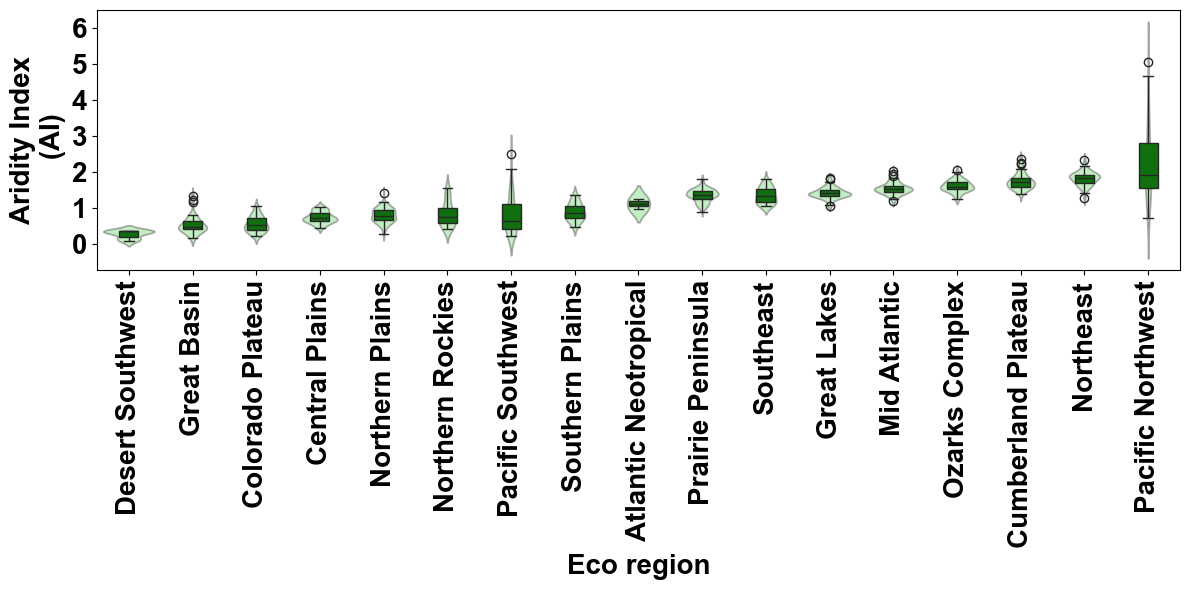

In [35]:
gf.plot_boxplot(df_yearly_climate2_avg,df_yearly_needed, column="AI", y_label= "Aridity Index\n (AI)")


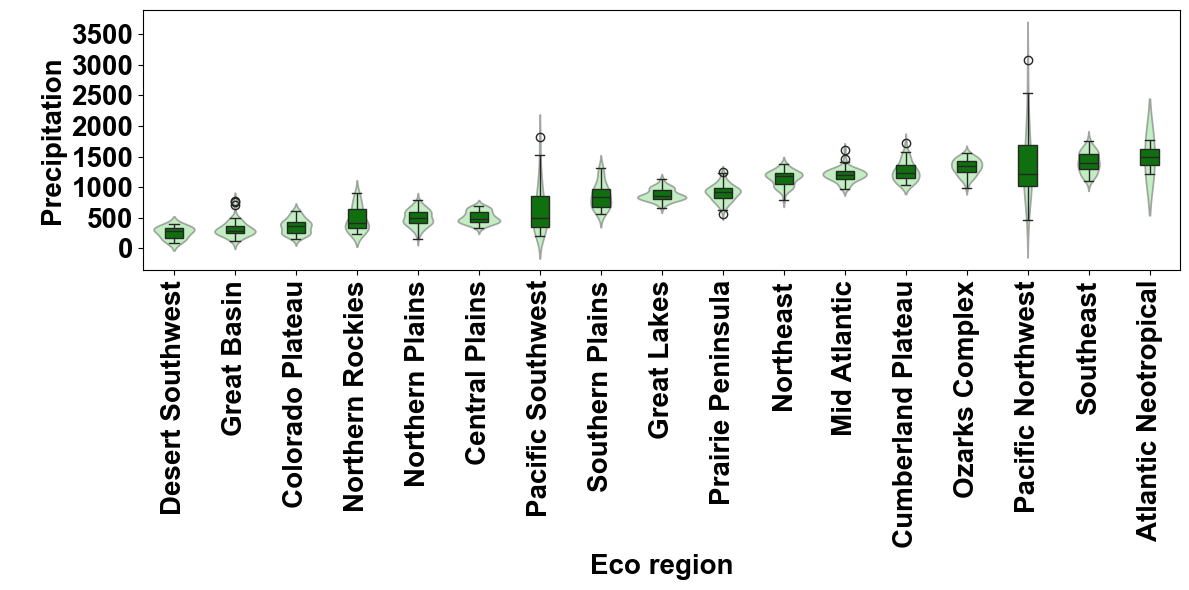

In [36]:
gf.plot_boxplot(df_yearly_climate2_avg,df_yearly_needed, column="PRCP", y_label= "\nPrecipitation")


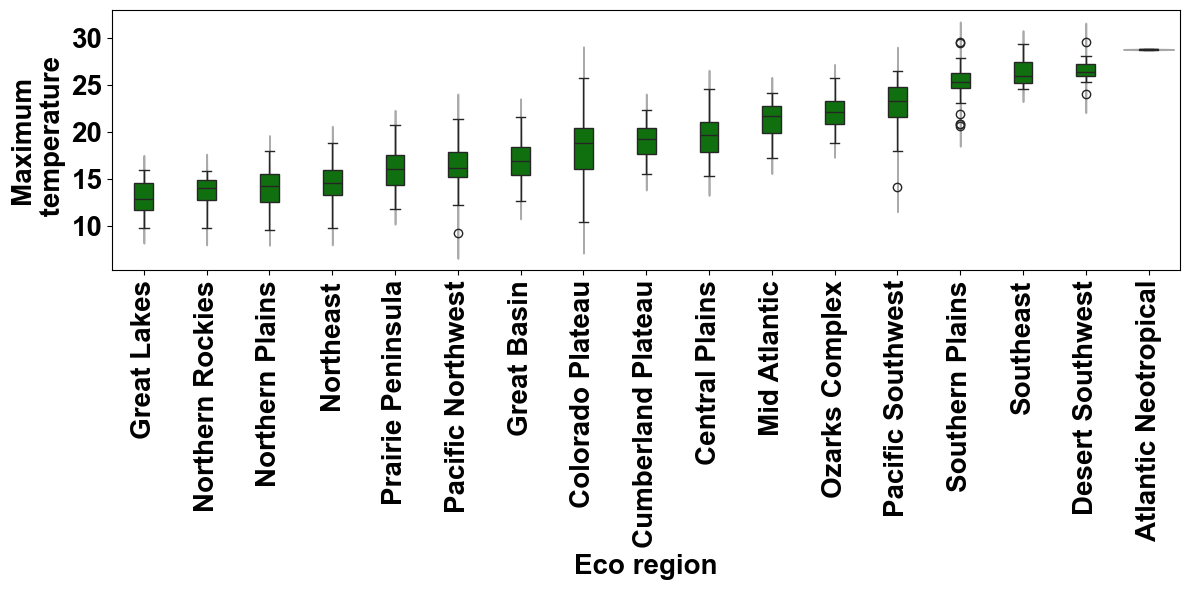

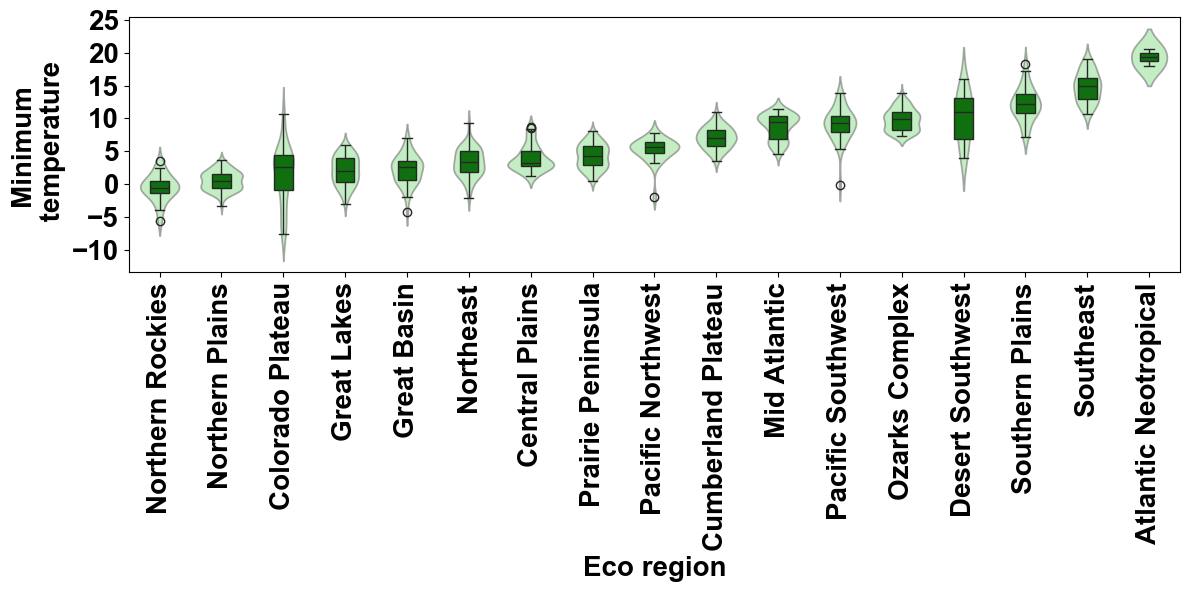

In [37]:
df_yearly_needed = df_yearly[["ID","Lat","Lon","domainName"]].drop_duplicates()
gf.plot_boxplot(df_yearly_climate2_avg,df_yearly_needed, column="TMAX", y_label= "Maximum\n temperature")
gf.plot_boxplot(df_yearly_climate2_avg,df_yearly_needed, column="TMIN", y_label= "Minimum\n temperature")


gf.plot_boxplot(df_yearly_climate2_avg,df_yearly_needed, column="TMAX", y_label= "Aridity Index (AI)")


In [38]:
# Merge df_yearly_100years_avg and df_yearly_climate2_avg with suffixes
df_merged = df_yearly_100years_avg.merge(
    df_yearly_climate2_avg, 
    on=["ID"], 
    how="outer", 
    suffixes=("_100yrs", "_climate2")
)

# Merge the resulting DataFrame with df_climate_diff
df_merged = df_merged.merge(
    df_climate_diff, 
    on=["ID"], 
    how="outer"
)

# Display the merged DataFrame
df_merged.head()

,ID,PRCP_100yrs,TMAX_100yrs,TMIN_100yrs,AI_100yrs,S_year,PRCP_climate2,TMAX_climate2,TMIN_climate2,AI_climate2,PRCP_DIFF,TMAX_DIFF,TMIN_DIFF,AI_DIFF
0,USC00011694,1450.738500,23.739462,10.494128,1.696565,1924,1480.230000,23.584534,10.585963,1.736713,6.261667,0.110299,0.581039,-0.044274
1,USC00012813,1681.446717,25.471512,13.817748,1.725962,1924,1746.618333,25.711222,13.435989,1.796906,84.653333,0.794830,-0.364626,0.051038
2,USC00013511,1347.255667,24.593303,12.118031,1.466049,1924,1304.292222,24.375797,12.473012,1.409185,-102.476111,-0.055023,1.264700,-0.190435
3,USC00013519,1464.070500,25.086355,12.136943,1.592303,1924,1498.260000,24.937566,11.383743,1.695511,71.585000,0.018650,-0.311491,0.105523
4,USC00017157,1448.740000,22.699203,8.989588,1.804113,1924,1502.945000,23.135077,9.886567,1.773941,24.849444,1.013444,1.837884,-0.185778


In [39]:
df_merged.shape

(861, 14)

In [40]:
df_yearly

,ID,YEAR,Lat,Lon,STATE,S_year,domainName,PRCP,TMAX,TMIN,PET_thornwaite,spei1,spei3,spei6,spei12,AI
0,USC00011694,1924,32.8158,-86.6044,AL,1924,Ozarks Complex,1466.0,23.433873,10.412778,846.979913,0.001398,-0.180419,-0.118583,0.027338,1.730856
1,USC00011694,1925,32.8158,-86.6044,AL,1924,Ozarks Complex,1225.0,25.007585,11.220741,919.128684,-0.341093,-0.371955,-0.136577,-0.046326,1.332784
2,USC00011694,1926,32.8158,-86.6044,AL,1924,Ozarks Complex,1600.8,23.538086,10.462645,860.749260,0.217070,-0.076862,-0.237494,-0.063782,1.859775
3,USC00011694,1927,32.8158,-86.6044,AL,1924,Ozarks Complex,1107.9,25.502519,11.701780,966.420938,-0.424142,-0.241929,-0.325932,-0.128300,1.146395
4,USC00011694,1928,32.8158,-86.6044,AL,1924,Ozarks Complex,1261.2,23.326303,10.117663,840.257520,-0.165275,-0.120014,-0.314696,-0.144120,1.500968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86095,USW00094967,2019,46.8997,-95.0669,MN,1924,Northern Plains,748.9,8.901874,-2.597975,609.498732,0.240374,-0.145247,-0.262586,-0.209485,1.228715
86096,USW00094967,2020,46.8997,-95.0669,MN,1924,Northern Plains,528.9,10.926977,-1.392647,604.741653,-0.097469,0.078288,-0.211242,-0.248903,0.874588
86097,USW00094967,2021,46.8997,-95.0669,MN,1924,Northern Plains,455.5,12.320000,-0.132146,690.789807,-0.537911,-0.193326,-0.278203,-0.305429,0.659390
86098,USW00094967,2022,46.8997,-95.0669,MN,1924,Northern Plains,503.8,9.540976,-2.499744,630.205587,-0.201682,-0.412094,-0.293423,-0.313713,0.799422


In [41]:
df_needed = df_yearly[["ID","domainName"]].drop_duplicates()

In [42]:
df_merged_updated = df_merged.merge(df_needed, on= "ID", how= "left")

In [43]:
df_merged_updated.head()

,ID,PRCP_100yrs,TMAX_100yrs,TMIN_100yrs,AI_100yrs,S_year,PRCP_climate2,TMAX_climate2,TMIN_climate2,AI_climate2,PRCP_DIFF,TMAX_DIFF,TMIN_DIFF,AI_DIFF,domainName
0,USC00011694,1450.738500,23.739462,10.494128,1.696565,1924,1480.230000,23.584534,10.585963,1.736713,6.261667,0.110299,0.581039,-0.044274,Ozarks Complex
1,USC00012813,1681.446717,25.471512,13.817748,1.725962,1924,1746.618333,25.711222,13.435989,1.796906,84.653333,0.794830,-0.364626,0.051038,Southeast
2,USC00013511,1347.255667,24.593303,12.118031,1.466049,1924,1304.292222,24.375797,12.473012,1.409185,-102.476111,-0.055023,1.264700,-0.190435,Ozarks Complex
3,USC00013519,1464.070500,25.086355,12.136943,1.592303,1924,1498.260000,24.937566,11.383743,1.695511,71.585000,0.018650,-0.311491,0.105523,Southeast
4,USC00017157,1448.740000,22.699203,8.989588,1.804113,1924,1502.945000,23.135077,9.886567,1.773941,24.849444,1.013444,1.837884,-0.185778,Ozarks Complex


df_region_summary = (
    df_merged_updated.groupby("domainName").agg({
        "PRCP_climate2": ["min", "mean", "max"],
        "TMAX_climate2": ["min", "mean", "max"],
        "TMIN_climate2": ["min", "mean", "max"]
    }).reset_index()
)
df_region_summary_update = df_region_summary.astype(int)

In [45]:
df_region_summary

domainName PRCP_climate2               \
                                                  min         mean   
0     Appalachians / Cumberland Plateau   1042.403333  1259.019961   
1                  Atlantic Neotropical   1218.285000  1493.712500   
2                        Central Plains    324.600000   513.554347   
3                      Desert Southwest     90.431111   259.121605   
4                           Great Basin    119.536667   327.529825   
5                           Great Lakes    664.105619   878.768748   
6                          Mid Atlantic    965.706222  1204.280241   
7                             Northeast    791.668333  1148.817118   
8                       Northern Plains    157.433333   499.602848   
9                      Northern Rockies    237.826667   476.773284   
10                       Ozarks Complex    993.183333  1327.949932   
11                    Pacific Northwest    468.593333  1383.913165   
12                    Pacific Southwest    197.322722   635.065844   
13                    Prairie Peninsula    561.986667   911.970870   
14                            Southeast   1106.525000  1410.818393   
15                      Southern Plains    552.883889   863.462112   
16  Southern Rockies / Colorado Plateau    157.786667   364.687083   

                TMAX_climate2                       TMIN_climate2             \
            max           min       mean        max           min       mean   
0   1718.834063     15.499075  19.042366  22.371737      3.427195   7.049845   
1   1769.140000     28.812258  28.826302  28.840346     18.034065  19.288601   
2    697.063333     15.255928  19.728681  24.578703      1.192042   3.943753   
3    393.168333     24.102572  26.634851  29.612707      3.885001  10.255484   
4    780.323333     12.654542  16.902493  21.609669     -4.263950   2.187030   
5   1126.946667      9.704762  13.035311  15.932472     -2.980727   2.049120   
6   1613.786667     17.202471  21.244589  24.200242      4.610318   8.765847   
7   1377.480000      9.707949  14.665901  18.844621     -2.082509   3.249937   
8    794.866667      9.513058  14.010866  18.006518     -3.420587   0.542334   
9    900.072778      9.692313  13.593094  15.883812     -5.676506  -0.538465   
10  1566.310000     18.777781  22.180678  25.751994      7.232520   9.793970   
11  3085.173333      9.187223  16.519862  21.373133     -1.964860   5.195654   
12  1824.705000     14.074976  22.864131  26.474403     -0.112881   9.131462   
13  1247.336667     11.731435  15.985756  20.749950      0.376388   4.249444   
14  1746.618333     24.652868  26.372729  29.439199     10.708842  14.807706   
15  1313.005089     20.614060  25.258267  29.636425      7.162379  12.182569   
16   617.624222     10.402301  18.209865  25.765082     -7.608581   1.635159   

               
          max  
0   10.897374  
1   20.543136  
2    8.640783  
3   15.922173  
4    7.067227  
5    5.888848  
6   11.345530  
7    9.240233  
8    3.686006  
9    3.441139  
10  13.820231  
11   7.752903  
12  13.911263  
13   8.102330  
14  19.077250  
15  18.315863  
16  10.656872

In [ ]:
df_region_summary = (
    df_merged_updated.groupby("domainName").agg({
        "PRCP_climate2": ["min", "mean", "max"],
        "TMAX_climate2": ["min", "mean", "max"],
        "TMIN_climate2": ["min", "mean", "max"]
    }).reset_index()
)

# Round numeric values and convert to int, preserving MultiIndex
df_region_summary.iloc[:, 1:] = df_region_summary.iloc[:, 1:].round().astype(int)


In [ ]:
df_region_summary

In [ ]:
df_region_summary.to_csv("df_region.csv")

In [ ]:
terminate

In [46]:
df_region_summary = (
    df_merged_updated.groupby("domainName").agg({
        "PRCP_climate2": ["min", "max", "mean", "median"],
        "TMAX_climate2": ["min", "max", "mean", "median"],
        "TMIN_climate2": ["min", "max", "mean", "median"]
    }).reset_index()
)

# Round numeric values and convert to int, preserving MultiIndex
df_region_summary.iloc[:, 1:] = df_region_summary.iloc[:, 1:].round().astype(int)
df_region_summary.to_csv("df_region.csv")

In [47]:
df_region_summary

domainName PRCP_climate2                          \
                                                  min     max    mean  median   
0     Appalachians / Cumberland Plateau        1042.0  1719.0  1259.0  1229.0   
1                  Atlantic Neotropical        1218.0  1769.0  1494.0  1494.0   
2                        Central Plains         325.0   697.0   514.0   480.0   
3                      Desert Southwest          90.0   393.0   259.0   288.0   
4                           Great Basin         120.0   780.0   328.0   287.0   
5                           Great Lakes         664.0  1127.0   879.0   857.0   
6                          Mid Atlantic         966.0  1614.0  1204.0  1203.0   
7                             Northeast         792.0  1377.0  1149.0  1177.0   
8                       Northern Plains         157.0   795.0   500.0   496.0   
9                      Northern Rockies         238.0   900.0   477.0   417.0   
10                       Ozarks Complex         993.0  1566.0  1328.0  1339.0   
11                    Pacific Northwest         469.0  3085.0  1384.0  1212.0   
12                    Pacific Southwest         197.0  1825.0   635.0   503.0   
13                    Prairie Peninsula         562.0  1247.0   912.0   920.0   
14                            Southeast        1107.0  1747.0  1411.0  1394.0   
15                      Southern Plains         553.0  1313.0   863.0   838.0   
16  Southern Rockies / Colorado Plateau         158.0   618.0   365.0   367.0   

   TMAX_climate2                    TMIN_climate2                     
             min   max  mean median           min   max  mean median  
0           15.0  22.0  19.0   19.0           3.0  11.0   7.0    7.0  
1           29.0  29.0  29.0   29.0          18.0  21.0  19.0   19.0  
2           15.0  25.0  20.0   20.0           1.0   9.0   4.0    3.0  
3           24.0  30.0  27.0   26.0           4.0  16.0  10.0   11.0  
4           13.0  22.0  17.0   17.0          -4.0   7.0   2.0    3.0  
5           10.0  16.0  13.0   13.0          -3.0   6.0   2.0    2.0  
6           17.0  24.0  21.0   22.0           5.0  11.0   9.0    9.0  
7           10.0  19.0  15.0   15.0          -2.0   9.0   3.0    3.0  
8           10.0  18.0  14.0   14.0          -3.0   4.0   1.0    0.0  
9           10.0  16.0  14.0   14.0          -6.0   3.0  -1.0   -1.0  
10          19.0  26.0  22.0   22.0           7.0  14.0  10.0   10.0  
11           9.0  21.0  17.0   16.0          -2.0   8.0   5.0    6.0  
12          14.0  26.0  23.0   23.0           0.0  14.0   9.0    9.0  
13          12.0  21.0  16.0   16.0           0.0   8.0   4.0    4.0  
14          25.0  29.0  26.0   26.0          11.0  19.0  15.0   15.0  
15          21.0  30.0  25.0   25.0           7.0  18.0  12.0   12.0  
16          10.0  26.0  18.0   19.0          -8.0  11.0   2.0    3.0

In [48]:
area_100

,ID,Area
0,USC00049452,8650.260255
1,USC00047902,6831.383561
2,USC00044957,4970.534591
3,USC00046730,15228.861848
4,USC00049473,10053.527381
...,...,...
858,USC00194105,11345.320237
859,USC00431580,6715.232116
860,USC00272999,4746.355375
861,USC00270690,10281.992507


In [50]:
df_area = area_100.copy()

In [51]:
df_yearly

,ID,YEAR,Lat,Lon,STATE,S_year,domainName,PRCP,TMAX,TMIN,PET_thornwaite,spei1,spei3,spei6,spei12,AI
0,USC00011694,1924,32.8158,-86.6044,AL,1924,Ozarks Complex,1466.0,23.433873,10.412778,846.979913,0.001398,-0.180419,-0.118583,0.027338,1.730856
1,USC00011694,1925,32.8158,-86.6044,AL,1924,Ozarks Complex,1225.0,25.007585,11.220741,919.128684,-0.341093,-0.371955,-0.136577,-0.046326,1.332784
2,USC00011694,1926,32.8158,-86.6044,AL,1924,Ozarks Complex,1600.8,23.538086,10.462645,860.749260,0.217070,-0.076862,-0.237494,-0.063782,1.859775
3,USC00011694,1927,32.8158,-86.6044,AL,1924,Ozarks Complex,1107.9,25.502519,11.701780,966.420938,-0.424142,-0.241929,-0.325932,-0.128300,1.146395
4,USC00011694,1928,32.8158,-86.6044,AL,1924,Ozarks Complex,1261.2,23.326303,10.117663,840.257520,-0.165275,-0.120014,-0.314696,-0.144120,1.500968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86095,USW00094967,2019,46.8997,-95.0669,MN,1924,Northern Plains,748.9,8.901874,-2.597975,609.498732,0.240374,-0.145247,-0.262586,-0.209485,1.228715
86096,USW00094967,2020,46.8997,-95.0669,MN,1924,Northern Plains,528.9,10.926977,-1.392647,604.741653,-0.097469,0.078288,-0.211242,-0.248903,0.874588
86097,USW00094967,2021,46.8997,-95.0669,MN,1924,Northern Plains,455.5,12.320000,-0.132146,690.789807,-0.537911,-0.193326,-0.278203,-0.305429,0.659390
86098,USW00094967,2022,46.8997,-95.0669,MN,1924,Northern Plains,503.8,9.540976,-2.499744,630.205587,-0.201682,-0.412094,-0.293423,-0.313713,0.799422


In [58]:
df_area

,ID,Area
0,USC00049452,8650.260255
1,USC00047902,6831.383561
2,USC00044957,4970.534591
3,USC00046730,15228.861848
4,USC00049473,10053.527381
...,...,...
858,USC00194105,11345.320237
859,USC00431580,6715.232116
860,USC00272999,4746.355375
861,USC00270690,10281.992507


In [60]:
df_unique = df[["ID","Area"]].drop_duplicates()
df_unique

,ID,Area
0,USC00011694,9014.522689
100,USC00012813,17574.065305
200,USC00013511,17631.352892
300,USC00013519,15844.156183
400,USC00017157,15101.696107
...,...,...
85600,USW00093992,14879.503705
85700,USW00094728,4623.610968
85800,USW00094849,3544.012100
85900,USW00094957,3022.957845


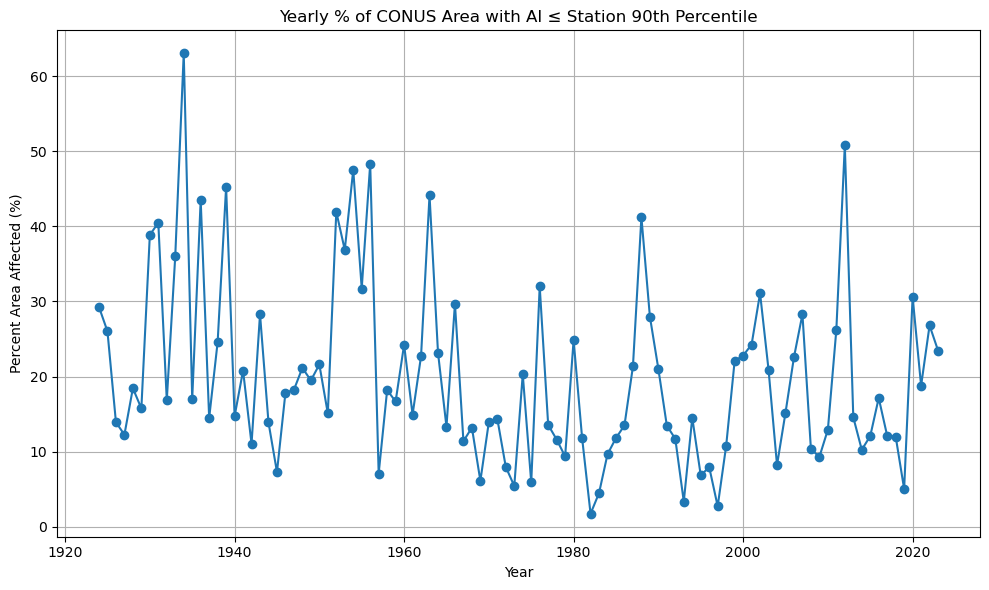

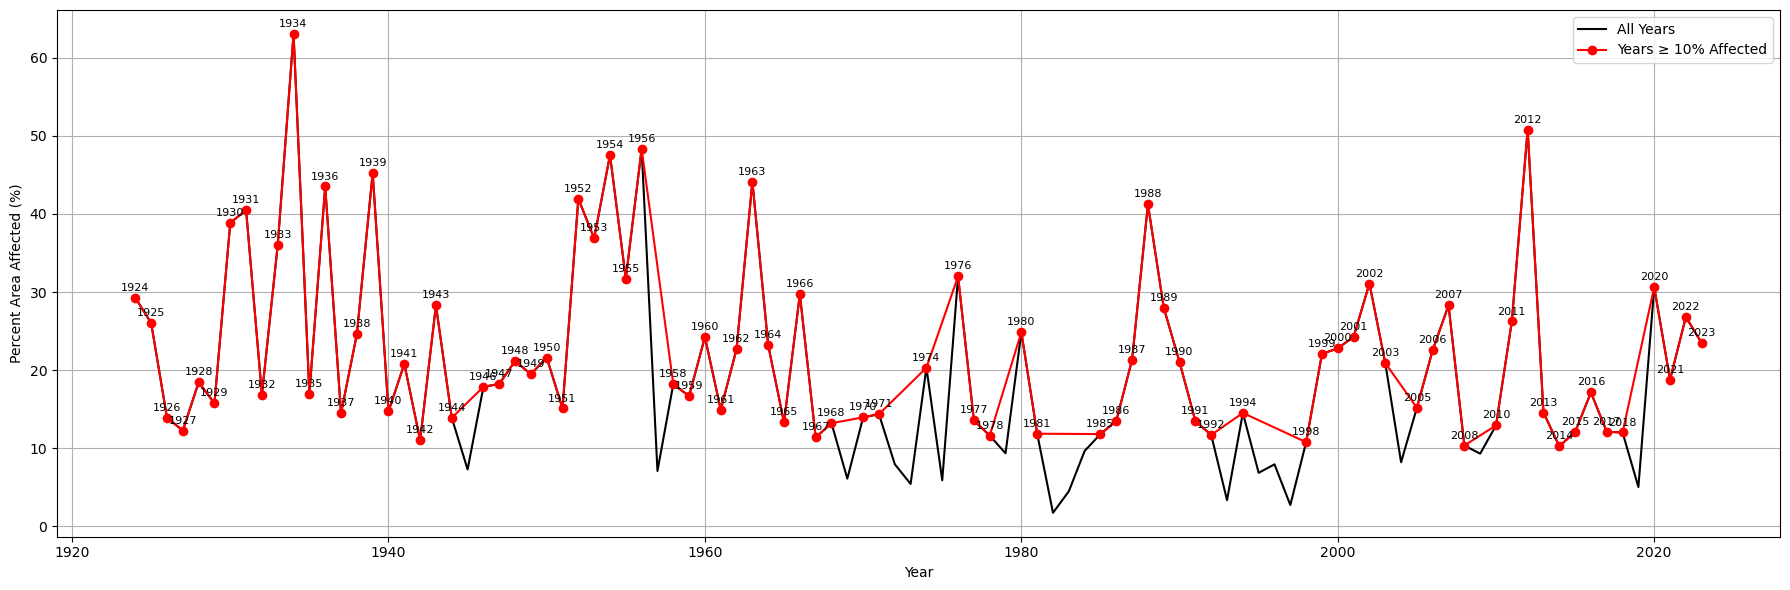

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# df_yearly has: ['Year', 'ID', 'AI']
# df_area has: ['ID', 'Area']

# Step 1: Merge df_yearly with df_area to add Area
df = df_yearly.merge(df_area, on='ID', how="left")

# Step 2: Compute 90th percentile AI per station
ai_90th = df.groupby('ID')['AI'].quantile(0.2).reset_index()
ai_90th.columns = ['ID', 'AI_90th']

# Step 3: Merge 90th percentile AI back into df
df = df.merge(ai_90th, on='ID')

# Step 4: Identify if station-year AI is less than or equal to its 90th percentile
df['Below_90th'] = df['AI'] <= df['AI_90th']

# Step 5: Compute yearly percent of area affected
# Total CONUS area (constant)
total_area = df_unique['Area'].sum()

# Group by year
df['Affected_Area'] = df['Area'] * df['Below_90th']

yearly_area_stats = df.groupby('YEAR')['Affected_Area'].sum().reset_index()
yearly_area_stats['Percent_Affected'] = 100 * yearly_area_stats['Affected_Area'] / total_area

# Step 6: Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_area_stats['YEAR'], yearly_area_stats['Percent_Affected'], marker='o')
plt.title('Yearly % of CONUS Area with AI ≤ Station 90th Percentile')
plt.xlabel('Year')
plt.ylabel('Percent Area Affected (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
yearly_area_stats_needed = yearly_area_stats[yearly_area_stats["Percent_Affected"]>=10]

import matplotlib.pyplot as plt

# Extract years and values where affected area >= 10%
filtered = yearly_area_stats[yearly_area_stats["Percent_Affected"] >= 10]

# Plot the full time series
plt.figure(figsize=(18, 6))
plt.plot(yearly_area_stats['YEAR'], yearly_area_stats['Percent_Affected'], label='All Years', color='black')
plt.plot(filtered['YEAR'], filtered['Percent_Affected'], 'ro-', label='Years ≥ 10% Affected')

# Annotate years above threshold
for _, row in filtered.iterrows():
    plt.annotate(f"{int(row['YEAR'])}", (row['YEAR'], row['Percent_Affected']),
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')

#plt.title('Annotated Dry Years: % Area Affected (AI ≤ 10th Percentile)')
plt.xlabel('Year')
plt.ylabel('Percent Area Affected (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Dry_years.png",dpi=500)
plt.show()


In [63]:
yearly_area_stats_needed = yearly_area_stats[yearly_area_stats["Percent_Affected"]>=10]

In [64]:
yearly_area_stats_needed

,YEAR,Affected_Area,Percent_Affected
0,1924,1.291170e+06,16.555364
1,1925,9.314649e+05,11.943226
6,1930,1.927955e+06,24.720205
7,1931,1.726465e+06,22.136700
9,1933,1.560894e+06,20.013755
10,1934,2.917043e+06,37.402275
12,1936,2.303809e+06,29.539398
15,1939,1.972619e+06,25.292889
17,1941,1.032129e+06,13.233942
19,1943,1.280113e+06,16.413590


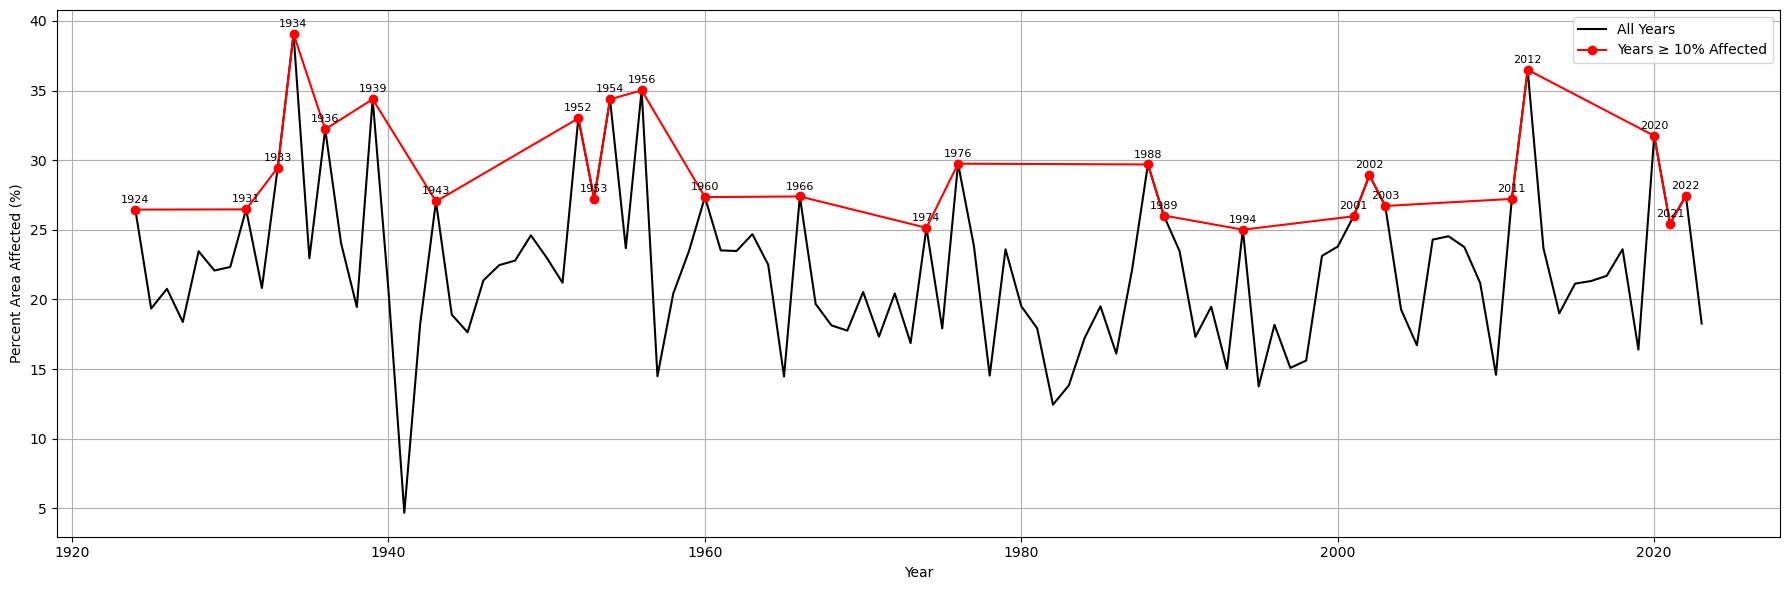

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge df_yearly with df_area to add Area
df = df_yearly.merge(df_area, on='ID', how="left")

# Use absolute AI threshold instead of percentile
df['Below_Threshold'] = df['AI'] < 0.5  # Absolute value

# Total CONUS area (constant)
total_area = df_area['Area'].sum()

# Compute affected area
df['Affected_Area'] = df['Area'] * df['Below_Threshold']

# Aggregate by year
yearly_area_stats = df.groupby('YEAR')['Affected_Area'].sum().reset_index()
yearly_area_stats['Percent_Affected'] = 100 * yearly_area_stats['Affected_Area'] / total_area

# Extract years where affected area ≥ 10%
filtered = yearly_area_stats[yearly_area_stats["Percent_Affected"] >= 25]

# Plot
plt.figure(figsize=(18, 6))
plt.plot(yearly_area_stats['YEAR'], yearly_area_stats['Percent_Affected'], label='All Years', color='black')
plt.plot(filtered['YEAR'], filtered['Percent_Affected'], 'ro-', label='Years ≥ 10% Affected')

# Annotate years above threshold
for _, row in filtered.iterrows():
    plt.annotate(f"{int(row['YEAR'])}", (row['YEAR'], row['Percent_Affected']),
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')

plt.xlabel('Year')
plt.ylabel('Percent Area Affected (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
#plt.savefig("Dry_years_absolute_threshold.png", dpi=500)
plt.show()


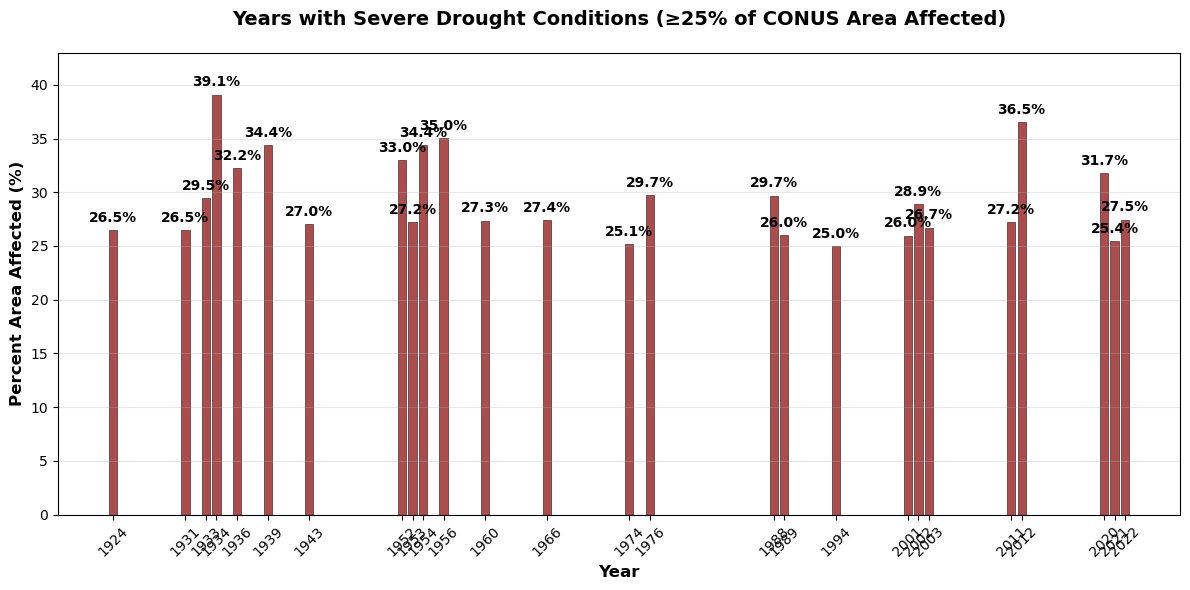

Number of severe drought years (≥25% affected): 26
Years: [1924, 1931, 1933, 1934, 1936, 1939, 1943, 1952, 1953, 1954, 1956, 1960, 1966, 1974, 1976, 1988, 1989, 1994, 2001, 2002, 2003, 2011, 2012, 2020, 2021, 2022]
Average affected area in severe years: 29.4%
Maximum affected area: 39.1% in 1934


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code for data preparation
df = df_yearly.merge(df_area, on='ID', how="left")
df['Below_Threshold'] = df['AI'] < 0.5  # Absolute value
total_area = df_area['Area'].sum()
df['Affected_Area'] = df['Area'] * df['Below_Threshold']
yearly_area_stats = df.groupby('YEAR')['Affected_Area'].sum().reset_index()
yearly_area_stats['Percent_Affected'] = 100 * yearly_area_stats['Affected_Area'] / total_area

# Extract years where affected area ≥ 25%
filtered = yearly_area_stats[yearly_area_stats["Percent_Affected"] >= 25]

# Create bar chart for filtered data
plt.figure(figsize=(18, 6))
bars = plt.bar(filtered['YEAR'], filtered['Percent_Affected'], 
               color='darkred', alpha=0.7, edgecolor='black', linewidth=0.5)

# Add value labels on top of bars
for i, (year, percent) in enumerate(zip(filtered['YEAR'], filtered['Percent_Affected'])):
    plt.text(year, percent + 0.5, f'{percent:.1f}%', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the plot
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Percent Area Affected (%)', fontsize=12, fontweight='bold')
plt.title('Years with Severe Drought Conditions (≥25% of CONUS Area Affected)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(filtered['YEAR'], rotation=45)

# Set y-axis to start from 0 and add some padding at the top
plt.ylim(0, filtered['Percent_Affected'].max() * 1.1)

plt.tight_layout()
# plt.savefig("Severe_drought_years_bar_chart.png", dpi=500, bbox_inches='tight')
plt.show()

# Print summary statistics
print(f"Number of severe drought years (≥25% affected): {len(filtered)}")
print(f"Years: {sorted(filtered['YEAR'].tolist())}")
print(f"Average affected area in severe years: {filtered['Percent_Affected'].mean():.1f}%")
print(f"Maximum affected area: {filtered['Percent_Affected'].max():.1f}% in {filtered.loc[filtered['Percent_Affected'].idxmax(), 'YEAR']}")

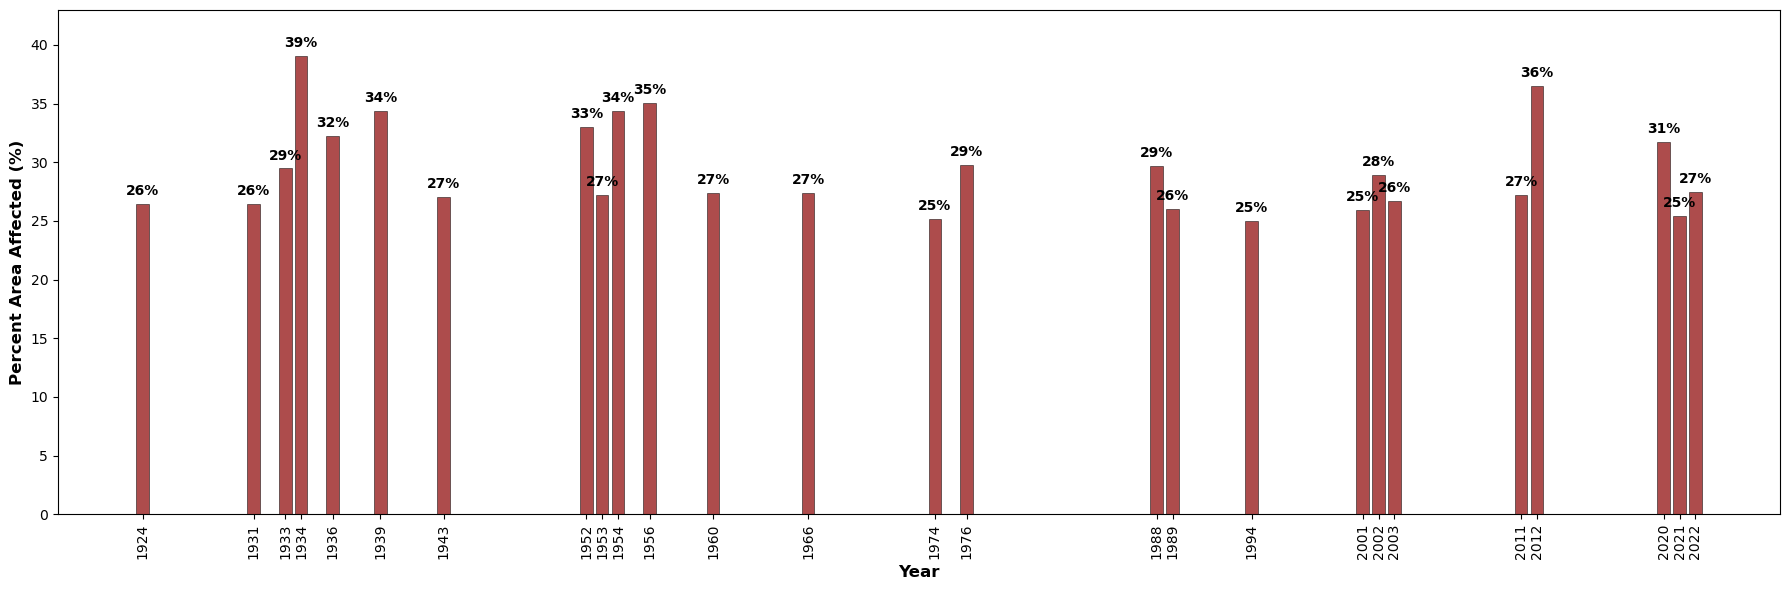

Number of severe drought years (≥25% affected): 26
Years: [1924, 1931, 1933, 1934, 1936, 1939, 1943, 1952, 1953, 1954, 1956, 1960, 1966, 1974, 1976, 1988, 1989, 1994, 2001, 2002, 2003, 2011, 2012, 2020, 2021, 2022]
Average affected area in severe years: 29.4%
Maximum affected area: 39.1% in 1934


In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code for data preparation
df = df_yearly.merge(df_area, on='ID', how="left")
df['Below_Threshold'] = df['AI'] < 0.5  # Absolute value
total_area = df_area['Area'].sum()
df['Affected_Area'] = df['Area'] * df['Below_Threshold']
yearly_area_stats = df.groupby('YEAR')['Affected_Area'].sum().reset_index()
yearly_area_stats['Percent_Affected'] = 100 * yearly_area_stats['Affected_Area'] / total_area

# Extract years where affected area ≥ 25%
filtered = yearly_area_stats[yearly_area_stats["Percent_Affected"] >= 25]

# Create bar chart for filtered data
plt.figure(figsize=(18, 6))
bars = plt.bar(filtered['YEAR'], filtered['Percent_Affected'], 
               color='darkred', alpha=0.7, edgecolor='black', linewidth=0.5)

# Add value labels on top of bars (as integers)
for i, (year, percent) in enumerate(zip(filtered['YEAR'], filtered['Percent_Affected'])):
    plt.text(year, percent + 0.5, f'{int(percent)}%', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the plot
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Percent Area Affected (%)', fontsize=12, fontweight='bold')
#plt.title('Years with Severe Drought Conditions (≥25% of CONUS Area Affected)', 
#          fontsize=14, fontweight='bold', pad=20)
plt.grid(False)
plt.xticks(filtered['YEAR'], rotation=90)

# Set y-axis to start from 0 and add some padding at the top
plt.ylim(0, filtered['Percent_Affected'].max() * 1.1)

plt.tight_layout()
plt.savefig("Severe_dry_years_bar_chart.png", dpi=500, bbox_inches='tight')
plt.show()

# Print summary statistics
print(f"Number of severe drought years (≥25% affected): {len(filtered)}")
print(f"Years: {sorted(filtered['YEAR'].tolist())}")
print(f"Average affected area in severe years: {filtered['Percent_Affected'].mean():.1f}%")
print(f"Maximum affected area: {filtered['Percent_Affected'].max():.1f}% in {filtered.loc[filtered['Percent_Affected'].idxmax(), 'YEAR']}")

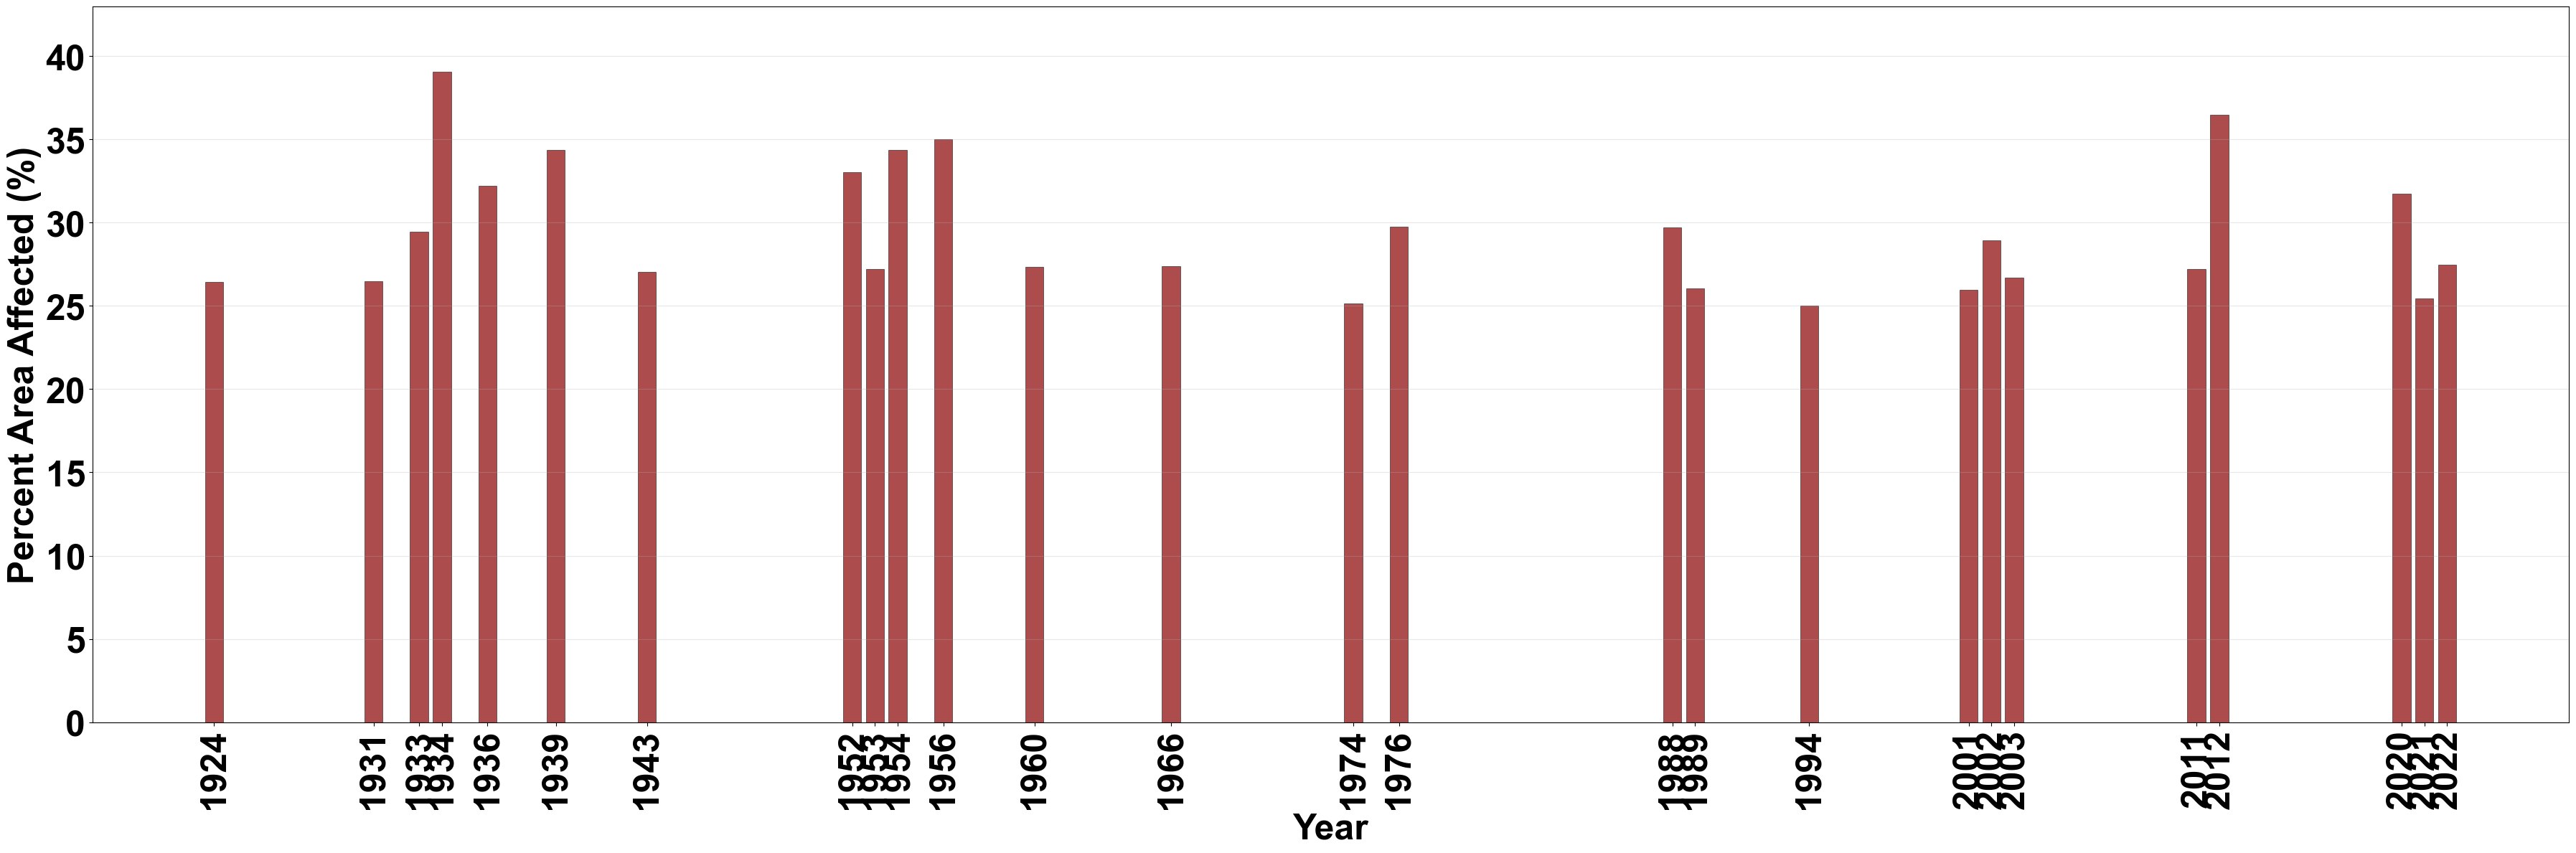

Number of severe drought years (≥25% affected): 26
Years: [1924, 1931, 1933, 1934, 1936, 1939, 1943, 1952, 1953, 1954, 1956, 1960, 1966, 1974, 1976, 1988, 1989, 1994, 2001, 2002, 2003, 2011, 2012, 2020, 2021, 2022]
Average affected area in severe years: 29.4%
Maximum affected area: 39.1% in 1934


In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code for data preparation
df = df_yearly.merge(df_area, on='ID', how="left")
df['Below_Threshold'] = df['AI'] < 0.5  # Absolute value
total_area = df_area['Area'].sum()
df['Affected_Area'] = df['Area'] * df['Below_Threshold']
yearly_area_stats = df.groupby('YEAR')['Affected_Area'].sum().reset_index()
yearly_area_stats['Percent_Affected'] = 100 * yearly_area_stats['Affected_Area'] / total_area

# Extract years where affected area ≥ 25%
filtered = yearly_area_stats[yearly_area_stats["Percent_Affected"] >= 25]

# Create bar chart for filtered data
plt.figure(figsize=(36, 12))
bars = plt.bar(filtered['YEAR'], filtered['Percent_Affected'], 
               color='darkred', alpha=0.7, edgecolor='black', linewidth=0.5)

# Add value labels on top of bars (as integers)
# for i, (year, percent) in enumerate(zip(filtered['YEAR'], filtered['Percent_Affected'])):
#     plt.text(year, percent + 0.5, f'{int(percent)}%', 
#              ha='center', va='bottom', fontsize=20, fontweight='bold', fontfamily='Arial')

# Customize the plot
plt.xlabel('Year', fontsize=36, fontweight='bold', fontfamily='Arial')
plt.ylabel('Percent Area Affected (%)', fontsize=36, fontweight='bold', fontfamily='Arial')
# plt.title('Years with Severe Drought Conditions (≥25% of CONUS Area Affected)', 
#           fontsize=20, fontweight='bold', fontfamily='Arial', pad=20)
plt.grid(True, alpha=0.3, axis='y')

# Set tick labels to be bold, Arial, size 20
plt.xticks(filtered['YEAR'], rotation=90, fontsize=36, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=36, fontweight='bold', fontfamily='Arial')

# Set y-axis to start from 0 and add some padding at the top
plt.ylim(0, filtered['Percent_Affected'].max() * 1.1)

plt.tight_layout()
plt.savefig("Severe_drought_years_bar_chart.png", dpi=500, bbox_inches='tight')
plt.show()

# Print summary statistics
print(f"Number of severe drought years (≥25% affected): {len(filtered)}")
print(f"Years: {sorted(filtered['YEAR'].tolist())}")
print(f"Average affected area in severe years: {filtered['Percent_Affected'].mean():.1f}%")
print(f"Maximum affected area: {filtered['Percent_Affected'].max():.1f}% in {filtered.loc[filtered['Percent_Affected'].idxmax(), 'YEAR']}")

In [76]:
filtered 

,YEAR,Affected_Area,Percent_Affected
0,1924,2.064223e+06,26.450414
7,1931,2.065450e+06,26.466145
9,1933,2.299710e+06,29.467888
10,1934,3.048928e+06,39.068165
12,1936,2.514444e+06,32.219426
15,1939,2.683170e+06,34.381438
19,1943,2.110013e+06,27.037155
28,1952,2.575967e+06,33.007765
29,1953,2.125023e+06,27.229493
30,1954,2.682618e+06,34.374362


In [55]:
#!pip install ruptures

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ruptures: filename=ruptures-1.1.9-cp313-cp313-win_amd64.whl size=470595 sha256=1a53d3c8b7af2b4c4b31a893dd5d677af81c2ccf36df0496487746b323a67193
  Stored in directory: c:\users\adeba\appdata\local\pip\cache\wheels\85\a9\70\0383733ae8f7a78f50ca60deb6afa1f1e8dc1da9b1c0e8f0dd
Successfully built ruptures


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt  # AI/statistics for time series change point detection

# Assuming 'yearly_area_stats' is already computed
series = yearly_area_stats['Percent_Affected'].values
years = yearly_area_stats['YEAR'].values

# Optional smoothing
window = 3  # try 5 or 7 too
series_smooth = pd.Series(series).rolling(window, center=True).mean().fillna(method='bfill').fillna(method='ffill')

# Change point detection: use Pelt algorithm with a linear model
model = "l2"
algo = rpt.Pelt(model=model).fit(series_smooth)
result = algo.predict(pen=5)  # pen: sensitivity. Try 3–10.

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years, series_smooth, label='Smoothed % Area Affected')
rpt.display(series_smooth.values, result, figsize=(12, 3))
plt.title("Detected Critical Dry Periods in CONUS")
plt.xlabel("Year")
plt.ylabel("% Area Affected (AI ≤ 90th)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print detected period ranges
start = 0
for end in result:
    period = (years[start], years[end - 1])
    print(f"Critical period: {period}")
    start = end


C:\Users\adeba\AppData\Local\Temp\ipykernel_37864\1926408570.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series_smooth = pd.Series(series).rolling(window, center=True).mean().fillna(method='bfill').fillna(method='ffill')


AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
df_merged["PRCP_30_100_diff"]= df_merged["PRCP_climate2"] - df_merged["PRCP_100yrs"]
df_merged["TMAX_30_100_diff"]= df_merged["TMAX_climate2"] - df_merged["TMAX_100yrs"]
df_merged["TMIN_30_100_diff"]= df_merged["TMIN_climate2"] - df_merged["TMIN_100yrs"]
df_merged["AI_30_100_diff"]= df_merged["AI_climate2"] - df_merged["AI_100yrs"]

df_yearly_needed = df_yearly[["ID","Lat","Lon"]].drop_duplicates()

df_merged_updated = df_merged.merge(df_yearly_needed, on="ID", how="left")

#df_merged_updated.to_csv("df_ai_pr_temp_avg.csv")

# df_sdii_pci_updated = df_sdii_pci.merge(df_yearly_needed, on="ID", how="left")
#df_yearly_climate2_updated = df_yearly_climate2.merge(df_yearly_needed, on="ID", how="left")


In [ ]:
df_yearly_needed_special = df_yearly[["ID","STATE","domainName"]].drop_duplicates()
df_yearly_needed_special = df_yearly_needed_special.merge(area_100, on="ID", how= "left")
df_merged_updated_state = df_merged_updated.merge(df_yearly_needed_special, on = "ID", how="left")

dakotas_state =["SD","ND","MN"]
dakota_info = df_yearly_needed_special[df_yearly_needed_special["STATE"].isin(dakotas_state)]
dakota_info_area = dakota_info.Area.sum()
dakota_info_area


dakota_info_area
total_area
dakotas_state =["SD","ND","MN"]
df_merged_updated_state_tmax_increase = df_merged_updated_state[df_merged_updated_state["TMAX_30_100_diff"]> 0]
df_merged_updated_state_tmax_increase
I have columns Area and STATE and ID. I want to know the percentage of conus that have this increae and the percentage of the dakotas that have this increase

In [ ]:
# Define the Dakotas states
dakotas_states = ["SD", "ND", "MN"]

# Calculate total area of CONUS (all states in your dataset)
total_conus_area = df_merged_updated_state['Area'].sum()

# Calculate the area with temperature increase (already filtered in your df_merged_updated_state_tmax_increase)
total_increase_area = df_merged_updated_state_tmax_increase['Area'].sum()

# Calculate percentage of CONUS with temperature increase
percent_conus_increase = (total_increase_area / total_conus_area) * 100

# Filter for just the Dakotas states in the original dataframe
dakotas_df = df_merged_updated_state[df_merged_updated_state['STATE'].isin(dakotas_states)]

# Calculate total area of the Dakotas
total_dakotas_area = dakotas_df['Area'].sum()

# Filter for Dakotas states with temperature increase
dakotas_increase_df = df_merged_updated_state_tmax_increase[df_merged_updated_state_tmax_increase['STATE'].isin(dakotas_states)]

# Calculate area of Dakotas with temperature increase
dakotas_increase_area = dakotas_increase_df['Area'].sum()

# Calculate percentage of Dakotas area with temperature increase
percent_dakotas_increase = (dakotas_increase_area / total_dakotas_area) * 100

# Calculate the average increase (difference) in TMAX_30_100_diff for CONUS
avg_conus_increase = df_merged_updated_state_tmax_increase['TMAX_30_100_diff'].mean()

# Calculate the average increase (difference) in TMAX_30_100_diff for Dakotas
avg_dakotas_increase = dakotas_increase_df['TMAX_30_100_diff'].mean()

# Print the results
print(f"Percentage of CONUS with temperature increase: {percent_conus_increase:.2f}%")
print(f"Average temperature increase in CONUS: {avg_conus_increase:.2f}")
print(f"Percentage of Dakotas region with temperature increase: {percent_dakotas_increase:.2f}%")
print(f"Average temperature increase in Dakotas: {avg_dakotas_increase:.2f}")

# Optional: You can also check the raw numbers
print(f"\nRaw numbers:")
print(f"Total CONUS area: {total_conus_area}")
print(f"CONUS area with increase: {total_increase_area}")
print(f"Total Dakotas area: {total_dakotas_area}")
print(f"Dakotas area with increase: {dakotas_increase_area}")

In [ ]:
def analyze_temperature_change(df, change_column, states_list=None, check_increase=True):
    """
    Analyze temperature changes for specified states and the entire CONUS.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The full dataframe containing temperature data
    change_column : str
        Column name with temperature change values to analyze (e.g., 'TMAX_30_100_diff' or 'TMAX_diff')
    states_list : list, optional
        List of state codes to analyze as a region (default None, which only analyzes CONUS)
    check_increase : bool, optional
        If True, check for increases (> 0), if False, check for decreases (< 0)
        
    Returns:
    --------
    dict
        Dictionary containing analysis results
    """
    # Create a copy of the dataframe to avoid modifying the original
    df_full = df.copy()
    
    # Filter for areas with increase or decrease based on check_increase parameter
    if check_increase:
        df_change = df_full[df_full[change_column] > 0]
        change_type = "increase"
    else:
        df_change = df_full[df_full[change_column] < 0]
        change_type = "decrease"
    
    # Calculate total area of CONUS and area with change
    total_conus_area = df_full['Area'].sum()
    total_change_area = df_change['Area'].sum()
    
    # Calculate percentage of CONUS with change
    percent_conus_change = (total_change_area / total_conus_area) * 100
    
    # Calculate the average change in the specified column for CONUS
    avg_conus_change = df_change[change_column].mean()
    
    results = {
        f"percent_conus_{change_type}": percent_conus_change,
        f"avg_conus_{change_type}": avg_conus_change,
        "total_conus_area": total_conus_area,
        f"conus_area_with_{change_type}": total_change_area
    }
    
    # If specific states are provided, analyze them as a region
    if states_list:
        # Filter for just the specified states in the original dataframe
        region_df = df_full[df_full['STATE'].isin(states_list)]
        
        # Calculate total area of the region
        total_region_area = region_df['Area'].sum()
        
        # Filter for region states with change
        region_change_df = df_change[df_change['STATE'].isin(states_list)]
        
        # Calculate area of region with change
        region_change_area = region_change_df['Area'].sum()
        
        # Calculate percentage of region area with change
        percent_region_change = (region_change_area / total_region_area) * 100 if total_region_area > 0 else 0
        
        # Calculate the average change in the specified column for the region
        avg_region_change = region_change_df[change_column].mean() if not region_change_df.empty else 0
        
        # Add region results to the dictionary
        region_name = "_".join(states_list) if len(states_list) <= 3 else f"{len(states_list)}_states"
        results.update({
            f"percent_{region_name}_{change_type}": percent_region_change,
            f"avg_{region_name}_{change_type}": avg_region_change,
            f"total_{region_name}_area": total_region_area,
            f"{region_name}_area_with_{change_type}": region_change_area
        })
    
    return results

# Example usage:
# Analyze TMAX_30_100_diff increases for Dakotas
dakotas_states = ["SD", "ND", "MN"]
tmax_30_100_increase_results = analyze_temperature_change(
    df_merged_updated_state, 
    'TMAX_30_100_diff', 
    dakotas_states, 
    check_increase=True
)
# Print results for TMAX_30_100_diff increases
print("Results for TMAX_30_100_diff increases:")
for key, value in tmax_30_100_increase_results.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

In [ ]:
# Analyze TMAX_diff decreases for Dakotas
tmax_diff_decrease_results = analyze_temperature_change(
    df_merged_updated_state, 
    'TMAX_DIFF', 
    dakotas_states, 
    check_increase=False
)


print("\nResults for TMAX_diff decreases:")
for key, value in tmax_diff_decrease_results.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

In [ ]:
def analyze_temperature_increases(df, dakotas_states=["SD", "ND", "MN"]):
    """
    Analyze temperature increases for TMAX_DIFF and TMAX_30_100_diff 
    for both Dakotas region and CONUS.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The full dataframe containing temperature data
    dakotas_states : list
        List of state codes representing the Dakotas region
        
    Returns:
    --------
    dict
        Dictionary containing analysis results
    """
    results = {}
    
    # Analyze increases for each column
    for column in ['TMAX_DIFF', 'TMAX_30_100_diff']:
        # Filter for areas with increase
        df_increase = df[df[column] > 0]
        
        # Calculate CONUS stats
        total_conus_area = df['Area'].sum()
        conus_increase_area = df_increase['Area'].sum()
        percent_conus_increase = (conus_increase_area / total_conus_area) * 100
        avg_conus_increase = df_increase[column].mean()
        
        # Calculate Dakotas stats
        dakotas_df = df[df['STATE'].isin(dakotas_states)]
        total_dakotas_area = dakotas_df['Area'].sum()
        
        dakotas_increase_df = df_increase[df_increase['STATE'].isin(dakotas_states)]
        dakotas_increase_area = dakotas_increase_df['Area'].sum()
        
        percent_dakotas_increase = (dakotas_increase_area / total_dakotas_area) * 100
        avg_dakotas_increase = dakotas_increase_df[column].mean()
        
        # Store results for this column
        col_key = column.replace('_', '')  # Clean up the column name for the dictionary key
        results[col_key] = {
            'percent_conus_increase': percent_conus_increase,
            'avg_conus_increase': avg_conus_increase,
            'percent_dakotas_increase': percent_dakotas_increase,
            'avg_dakotas_increase': avg_dakotas_increase
        }
    
    return results

# Run the analysis
results = analyze_temperature_increases(df_merged_updated_state)

# Print the results in a clean, single-figure format
print("Temperature Increase Analysis Summary:")
print("-" * 50)
print(f"{'Column':<20} {'Region':<10} {'% Area':<10} {'Avg Increase':<15}")
print("-" * 50)

for column, data in results.items():
    print(f"{column:<20} {'CONUS':<10} {data['percent_conus_increase']:.2f}% {data['avg_conus_increase']:.2f}")
    print(f"{'':<20} {'Dakotas':<10} {data['percent_dakotas_increase']:.2f}% {data['avg_dakotas_increase']:.2f}")
    print("-" * 50)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_temperature_increases(df, dakotas_states=["SD", "ND", "MN"]):
    """
    Analyze temperature increases for TMAX_DIFF and TMAX_30_100_diff for 
    both Dakotas region and CONUS, and visualize as a heatmap.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The full dataframe containing temperature data
    dakotas_states : list
        List of state codes representing the Dakotas region
    """
    results = {}
    
    # Analyze increases for each column
    for column in ['TMAX_DIFF', 'TMAX_30_100_diff']:
        # Filter for areas with increase
        df_increase = df[df[column] > 0]
        
        # Calculate CONUS stats
        total_conus_area = df['Area'].sum()
        conus_increase_area = df_increase['Area'].sum()
        percent_conus_increase = (conus_increase_area / total_conus_area) * 100
        avg_conus_increase = df_increase[column].mean()
        
        # Calculate Dakotas stats
        dakotas_df = df[df['STATE'].isin(dakotas_states)]
        total_dakotas_area = dakotas_df['Area'].sum()
        
        dakotas_increase_df = df_increase[df_increase['STATE'].isin(dakotas_states)]
        dakotas_increase_area = dakotas_increase_df['Area'].sum()
        
        percent_dakotas_increase = (dakotas_increase_area / total_dakotas_area) * 100
        avg_dakotas_increase = dakotas_increase_df[column].mean()
        
        # Store results for this column
        col_key = column
        results[col_key] = {
            'percent_conus_increase': percent_conus_increase,
            'avg_conus_increase': avg_conus_increase,
            'percent_dakotas_increase': percent_dakotas_increase,
            'avg_dakotas_increase': avg_dakotas_increase
        }
    
    # Create dataframes for heatmap visualization
    percent_data = {
        'Region': ['CONUS', 'Dakotas'],
        'TMAX_DIFF': [results['TMAX_DIFF']['percent_conus_increase'], 
                      results['TMAX_DIFF']['percent_dakotas_increase']],
        'TMAX_30_100_diff': [results['TMAX_30_100_diff']['percent_conus_increase'], 
                            results['TMAX_30_100_diff']['percent_dakotas_increase']]
    }
    
    avg_data = {
        'Region': ['CONUS', 'Dakotas'],
        'TMAX_DIFF': [results['TMAX_DIFF']['avg_conus_increase'], 
                     results['TMAX_DIFF']['avg_dakotas_increase']],
        'TMAX_30_100_diff': [results['TMAX_30_100_diff']['avg_conus_increase'], 
                           results['TMAX_30_100_diff']['avg_dakotas_increase']]
    }
    
    df_percent = pd.DataFrame(percent_data).set_index('Region')
    df_avg = pd.DataFrame(avg_data).set_index('Region')
    
    # Create the heatmap visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Heatmap for percentage of area with increase
    sns.heatmap(df_percent, annot=True, fmt='.2f', cmap='YlOrRd', 
                ax=axes[0], cbar_kws={'label': '%'})
    axes[0].set_title('Percentage of Area with Temperature Increase')
    
    # Heatmap for average increase
    sns.heatmap(df_avg, annot=True, fmt='.2f', cmap='YlOrRd', 
                ax=axes[1], cbar_kws={'label': 'Temperature'})
    axes[1].set_title('Average Temperature Increase')
    
    plt.tight_layout()
    plt.suptitle('Temperature Increase Analysis', fontsize=16, y=1.05)
    
    # Print the numerical results as well
    print("Temperature Increase Analysis Summary:")
    print("-" * 50)
    print(f"{'Column':<20} {'Region':<10} {'% Area':<10} {'Avg Increase':<15}")
    print("-" * 50)
    
    for column, data in results.items():
        print(f"{column:<20} {'CONUS':<10} {data['percent_conus_increase']:.2f}% {data['avg_conus_increase']:.2f}")
        print(f"{'':<20} {'Dakotas':<10} {data['percent_dakotas_increase']:.2f}% {data['avg_dakotas_increase']:.2f}")
        print("-" * 50)
    
    return fig, results

# Example usage:
fig, results = analyze_and_visualize_temperature_increases(df_merged_updated_state)
plt.show()


In [ ]:
fig, results = analyze_and_visualize_temperature_increases(df_merged_updated_state)
plt.show()

In [ ]:
I want a single heatmap to represent the info, also I would appreciate if the function outputs results and another do the plotting so that we can easily change plots without recalculation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_temperature_increase_stats(df, dakotas_states=["SD", "ND", "MN"]):
    """
    Computes temperature increase statistics for CONUS and Dakotas region.

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing 'STATE', 'Area', and temperature difference columns.
    dakotas_states : list
        List of state codes representing the Dakotas region.

    Returns:
    --------
    dict: Dictionary of computed statistics.
    """
    results = {}
    
    for column in ['TMAX_DIFF', 'TMAX_30_100_diff']:
        df_increase = df[df[column] > 0]

        total_conus_area = df['Area'].sum()
        conus_increase_area = df_increase['Area'].sum()
        percent_conus_increase = (conus_increase_area / total_conus_area) * 100
        avg_conus_increase = df_increase[column].mean()

        dakotas_df = df[df['STATE'].isin(dakotas_states)]
        total_dakotas_area = dakotas_df['Area'].sum()

        dakotas_increase_df = df_increase[df_increase['STATE'].isin(dakotas_states)]
        dakotas_increase_area = dakotas_increase_df['Area'].sum()
        percent_dakotas_increase = (dakotas_increase_area / total_dakotas_area) * 100
        avg_dakotas_increase = dakotas_increase_df[column].mean()

        results[column] = {
            'CONUS': {
                'percent_increase': percent_conus_increase,
                'avg_increase': avg_conus_increase
            },
            'Dakotas': {
                'percent_increase': percent_dakotas_increase,
                'avg_increase': avg_dakotas_increase
            }
        }

    return results




def plot_temperature_increase_heatmap(results):
    """
    Plots a single heatmap where:
    - Cell color = average temperature increase
    - Cell annotation = % area with increase
    - Fonts = Arial, bold, size 16 for everything
    """
    regions = ['CONUS', 'Dakotas']
    columns = list(results.keys())

    # Data prep
    data_avg = []
    data_percent = []

    for region in regions:
        avg_row = []
        percent_row = []
        for col in columns:
            avg_row.append(results[col][region]['avg_increase'])
            percent_row.append(f"{results[col][region]['percent_increase']:.1f}%")
        data_avg.append(avg_row)
        data_percent.append(percent_row)

    df_avg = pd.DataFrame(data_avg, index=regions, columns=columns)
    df_percent = pd.DataFrame(data_percent, index=regions, columns=columns)

    # Plot
    plt.figure(figsize=(8, 4))
    ax = sns.heatmap(
        df_avg,
        annot=df_percent,
        fmt='',
        cmap='YlOrBr',
        cbar_kws={'label': 'Avg Temp Increase (°C)'},
        annot_kws={"fontsize": 16, "fontweight": "bold", "fontname": "Arial"}
    )

    # Font styling
    ax.set_title('TMAX Increase (Color = Avg, Text = % Area)', fontsize=16, fontweight='bold', fontname='Arial')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, fontweight='bold', fontname='Arial')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, fontweight='bold', fontname='Arial', rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=16)

    # Colorbar label styling
    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(16)
    colorbar.ax.yaxis.label.set_weight('bold')
    colorbar.ax.yaxis.label.set_fontname('Arial')
    colorbar.ax.tick_params(labelsize=16)

    plt.tight_layout()
    plt.show()
results = compute_temperature_increase_stats(df_merged_updated_state)
plot_temperature_increase_heatmap(results)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_temperature_increase_stats(df, index_columns, dakotas_states=["SD", "ND", "MN"]):
    """
    Computes temperature increase statistics for CONUS and Dakotas region for specified index columns.

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing 'STATE', 'Area', and temperature difference columns.
    index_columns : list of str
        List of column names to compute statistics for (e.g., ['TMIN_DIFF', 'TMIN_30_100_diff'])
    dakotas_states : list
        List of state codes representing the Dakotas region.

    Returns:
    --------
    dict: Dictionary of computed statistics.
    """
    results = {}
    
    for column in index_columns:
        df_increase = df[df[column] > 0]

        total_conus_area = df['Area'].sum()
        conus_increase_area = df_increase['Area'].sum()
        percent_conus_increase = (conus_increase_area / total_conus_area) * 100
        avg_conus_increase = df_increase[column].mean()

        dakotas_df = df[df['STATE'].isin(dakotas_states)]
        total_dakotas_area = dakotas_df['Area'].sum()

        dakotas_increase_df = df_increase[df_increase['STATE'].isin(dakotas_states)]
        dakotas_increase_area = dakotas_increase_df['Area'].sum()
        percent_dakotas_increase = (dakotas_increase_area / total_dakotas_area) * 100
        avg_dakotas_increase = dakotas_increase_df[column].mean()

        results[column] = {
            'CONUS': {
                'percent_increase': percent_conus_increase,
                'avg_increase': avg_conus_increase
            },
            'Dakotas': {
                'percent_increase': percent_dakotas_increase,
                'avg_increase': avg_dakotas_increase
            }
        }

    return results


def plot_temperature_increase_heatmap(results, title='Avg Temperature Increase (Color) with % Area Increase (Text)'):
    """
    Plots a single heatmap:
    - Cell color = average temperature increase
    - Cell annotation = % area with increase
    - Fonts = Arial, bold, size 16 for everything

    Parameters:
    -----------
    results : dict
        Output from compute_temperature_increase_stats().
    title : str
        Title of the plot.
    """
    regions = ['CONUS', 'Dakotas']
    columns = list(results.keys())

    data_avg = []
    data_percent = []

    for region in regions:
        avg_row = []
        percent_row = []
        for col in columns:
            avg_row.append(results[col][region]['avg_increase'])
            percent_row.append(f"{results[col][region]['percent_increase']:.1f}%")
        data_avg.append(avg_row)
        data_percent.append(percent_row)

    df_avg = pd.DataFrame(data_avg, index=regions, columns=columns)
    df_percent = pd.DataFrame(data_percent, index=regions, columns=columns)

    plt.figure(figsize=(8, 4))
    ax = sns.heatmap(
        df_avg,
        annot=df_percent,
        fmt='',
        cmap='YlOrBr',
        cbar_kws={'label': 'Avg Temp Increase (°C)'},
        annot_kws={"fontsize": 16, "fontweight": "bold", "fontname": "Arial"}
    )

    ax.set_title(title, fontsize=16, fontweight='bold', fontname='Arial')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, fontweight='bold', fontname='Arial')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, fontweight='bold', fontname='Arial', rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=16)

    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(16)
    colorbar.ax.yaxis.label.set_weight('bold')
    colorbar.ax.yaxis.label.set_fontname('Arial')
    colorbar.ax.tick_params(labelsize=16)

    plt.tight_layout()
    plt.show()


In [ ]:
# For TMIN-based indices
tmin_columns = ['TMIN_DIFF', 'TMIN_30_100_diff']
results = compute_temperature_increase_stats(df_merged_updated_state, tmin_columns)
plot_temperature_increase_heatmap(results, title='TMIN Increase (Color = Avg, Text = % Area)')


In [ ]:
def compute_precipitation_decrease_stats(df, index_columns, dakotas_states=["SD", "ND", "MN"]):
    """
    Computes precipitation *decrease* statistics for CONUS and Dakotas region for specified index columns.

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing 'STATE', 'Area', and precipitation difference columns.
    index_columns : list of str
        List of column names to compute statistics for (e.g., ['PRCP_DIFF', 'PRCP_30_100_diff'])
    dakotas_states : list
        List of state codes representing the Dakotas region.

    Returns:
    --------
    dict: Dictionary of computed stats.
    """
    results = {}

    for column in index_columns:
        df_decrease = df[df[column] < 0]  # Note the < 0 for decrease

        total_conus_area = df['Area'].sum()
        conus_decrease_area = df_decrease['Area'].sum()
        percent_conus_decrease = (conus_decrease_area / total_conus_area) * 100
        avg_conus_decrease = df_decrease[column].mean()

        dakotas_df = df[df['STATE'].isin(dakotas_states)]
        total_dakotas_area = dakotas_df['Area'].sum()

        dakotas_decrease_df = df_decrease[df_decrease['STATE'].isin(dakotas_states)]
        dakotas_decrease_area = dakotas_decrease_df['Area'].sum()
        percent_dakotas_decrease = (dakotas_decrease_area / total_dakotas_area) * 100
        avg_dakotas_decrease = dakotas_decrease_df[column].mean()

        results[column] = {
            'CONUS': {
                'percent_decrease': percent_conus_decrease,
                'avg_decrease': avg_conus_decrease
            },
            'Dakotas': {
                'percent_decrease': percent_dakotas_decrease,
                'avg_decrease': avg_dakotas_decrease
            }
        }

    return results

def plot_precipitation_decrease_heatmap(results, title='Avg Precipitation Decrease (Color) with % Area Decrease (Text)'):
    """
    Plots a single heatmap where:
    - Cell color = avg precipitation decrease
    - Cell annotation = % area with decrease
    """
    regions = ['CONUS', 'Dakotas']
    columns = list(results.keys())

    data_avg = []
    data_percent = []

    for region in regions:
        avg_row = []
        percent_row = []
        for col in columns:
            avg_row.append(results[col][region]['avg_decrease'])
            percent_row.append(f"{results[col][region]['percent_decrease']:.1f}%")
        data_avg.append(avg_row)
        data_percent.append(percent_row)

    df_avg = pd.DataFrame(data_avg, index=regions, columns=columns)
    df_percent = pd.DataFrame(data_percent, index=regions, columns=columns)

    plt.figure(figsize=(8, 4))
    ax = sns.heatmap(
        df_avg,
        annot=df_percent,
        fmt='',
        #cmap='YlGnBu',
        cmap='Greens',
        cbar_kws={'label': 'Avg Precip Decrease (mm)'},
        annot_kws={"fontsize": 16, "fontweight": "bold", "fontname": "Arial"}
    )

    ax.set_title(title, fontsize=16, fontweight='bold', fontname='Arial')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, fontweight='bold', fontname='Arial')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, fontweight='bold', fontname='Arial', rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=16)

    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(16)
    colorbar.ax.yaxis.label.set_weight('bold')
    colorbar.ax.yaxis.label.set_fontname('Arial')
    colorbar.ax.tick_params(labelsize=16)

    plt.tight_layout()
    plt.show()


In [ ]:
prcp_columns = ['PRCP_DIFF', 'PRCP_30_100_diff']
results = compute_precipitation_decrease_stats(df_merged_updated_state, prcp_columns)
plot_precipitation_decrease_heatmap(results, title='PRCP Decrease (Color = Avg, Text = % Area)')


In [ ]:
ai_columns = ['AI_DIFF', 'AI_30_100_diff']
results = compute_precipitation_decrease_stats(df_merged_updated_state, ai_columns)
plot_precipitation_decrease_heatmap(results, title='AI Decrease (Color = Avg, Text = % Area)')


In [ ]:
df_merged_updated_state

In [ ]:
terminate

In [ ]:
def compute_precipitation_decrease_stats(df, index_columns, region_states=["SD", "ND", "MN"]):
    """
    Computes precipitation *decrease* statistics for CONUS and region region for specified index columns.

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing 'STATE', 'Area', and precipitation difference columns.
    index_columns : list of str
        List of column names to compute statistics for (e.g., ['PRCP_DIFF', 'PRCP_30_100_diff'])
    region_states : list
        List of state codes representing the region region.

    Returns:
    --------
    dict: Dictionary of computed stats.
    """
    results = {}

    for column in index_columns:
        df_decrease = df[df[column] < 0]  # Note the < 0 for decrease

        total_conus_area = df['Area'].sum()
        conus_decrease_area = df_decrease['Area'].sum()
        percent_conus_decrease = (conus_decrease_area / total_conus_area) * 100
        avg_conus_decrease = df_decrease[column].mean()
        
        for region in df.domainName.unique():
            

            region_df = df[df['domainName']== region ]
            total_region_area = region_df['Area'].sum()

            region_decrease_df = df_decrease[df_decrease['STATE'].isin(region_states)]
            region_decrease_area = region_decrease_df['Area'].sum()
            percent_region_decrease = (region_decrease_area / total_region_area) * 100
            avg_region_decrease = region_decrease_df[column].mean()

            results[column] = {
                'CONUS': {
                    'percent_decrease': percent_conus_decrease,
                    'avg_decrease': avg_conus_decrease
                },
                region: {
                    'percent_decrease': percent_region_decrease,
                    'avg_decrease': avg_region_decrease
                }
            }

    return results

In [ ]:
def compute_precipitation_decrease_stats(df, index_columns):
    """
    Computes precipitation *decrease* statistics for CONUS and each domain region.

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing 'STATE', 'Area', 'domainName', and precipitation difference columns.
    index_columns : list of str
        List of column names to compute statistics for (e.g., ['PRCP_DIFF', 'PRCP_30_100_diff'])
    region_states : list
        List of state codes representing a specific region (e.g., for Dakotas/Minnesota).

    Returns:
    --------
    dict: Dictionary of computed statistics per index column, with subkeys for CONUS, each domain, and the specified region.
    """
    results = {}

    for column in index_columns:
        df_decrease = df[df[column] < 0]  # Only rows with a decrease

        # CONUS stats
        total_conus_area = df['Area'].sum()
        conus_decrease_area = df_decrease['Area'].sum()
        percent_conus_decrease = (conus_decrease_area / total_conus_area) * 100
        avg_conus_decrease = df_decrease[column].mean()

        # Initialize results for this column
        results[column] = {
            'CONUS': {
                'percent_decrease': percent_conus_decrease,
                'avg_decrease': avg_conus_decrease
            }
        }

        # Per domain region stats
        for region in df['domainName'].unique():
            region_df = df[df['domainName'] == region]
            region_decrease_df = df_decrease[df_decrease['domainName'] == region]

            total_region_area = region_df['Area'].sum()
            region_decrease_area = region_decrease_df['Area'].sum()

            percent_region_decrease = (region_decrease_area / total_region_area) * 100 if total_region_area > 0 else 0
            avg_region_decrease = region_decrease_df[column].mean()

            results[column][region] = {
                'percent_decrease': percent_region_decrease,
                'avg_decrease': avg_region_decrease
            }

        

    return results


In [ ]:
def plot_precipitation_decrease_heatmap(df1, results, title='Avg Precipitation Decrease (Color) with % Area Decrease (Text)', 
                                        cbar_label="Precipitation Decrease", font_size=20):
    """
    Plots a single heatmap where:
    - Cell color = avg precipitation decrease
    - Cell annotation = % area with decrease
    Parameters:
    -----------
    df1 : pd.DataFrame
        Input DataFrame with domainName, Area, etc.
    results : dict
        Results dictionary with avg_decrease and percent_decrease per region.
    title : str
        Title of the plot.
    cbar_label : str
        Colorbar label.
    font_size : int
        Base font size for labels, annotations, and ticks (default is 20).
    """
    replace_dict = {
        "Southern Rockies / Colorado Plateau": "Colorado Plateau",
        "Appalachians / Cumberland Plateau": "Cumberland Plateau"
    }

    df = df1.copy()
    if "domainName" in df.columns:
        df["domainName"] = df["domainName"].replace(replace_dict)
    regions = list(df['domainName'].unique())
    if 'CONUS' not in regions:
        regions.append('CONUS')

    columns = list(results.keys())

    data_avg = []
    data_percent = []

    # Replace names in results to match cleaned region names
    updated_results = {}
    for metric in results:
        updated_results[metric] = {}
        for region_name, stats in results[metric].items():
            new_region_name = replace_dict.get(region_name, region_name)
            updated_results[metric][new_region_name] = stats
    results = updated_results

    for region in regions:
        avg_row = []
        percent_row = []
        for col in columns:
            if region in results[col]:
                avg_val = results[col][region]['avg_decrease']
                percent_val = results[col][region]['percent_decrease']
            else:
                avg_val = None
                percent_val = 0.0
            avg_row.append(avg_val)
            percent_row.append(f"{percent_val:.1f}%")
        data_avg.append(avg_row)
        data_percent.append(percent_row)

    df_avg = pd.DataFrame(data_avg, index=regions, columns=columns)
    df_percent = pd.DataFrame(data_percent, index=regions, columns=columns)

    plt.figure(figsize=(10, max(4, len(regions) * 0.5)))
    ax = sns.heatmap(
        df_avg,
        annot=df_percent,
        fmt='',
        cmap='coolwarm',
        cbar_kws={'label': cbar_label},
        annot_kws={"fontsize": font_size, "fontweight": "bold", "fontname": "Arial"},
        linewidths=0.5,
        linecolor='gray'
    )

    ax.set_title(title, fontsize=font_size, fontweight='bold', fontname='Arial')
    ax.set_xticklabels(["Penultimate", "Centennial"], fontsize=font_size, fontweight='bold', fontname='Arial')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=font_size, fontweight='bold', fontname='Arial', rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=font_size)

    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(font_size)
    colorbar.ax.yaxis.label.set_weight('bold')
    colorbar.ax.yaxis.label.set_fontname('Arial')
    colorbar.ax.tick_params(labelsize=font_size)

    plt.tight_layout()
    plt.savefig("AI_PRE_heatmap.png", dpi= 500, transparent= True, bbox_inches='tight')
    plt.show()
    
ai_columns = ['AI_DIFF', 'AI_30_100_diff']
results = compute_precipitation_decrease_stats(df_merged_updated_state, ai_columns)
plot_precipitation_decrease_heatmap(df_merged_updated_state, results, title='AI Decrease (Color = Avg, Text = % Area)', cbar_label="AI Decrease",font_size=20)


In [ ]:
df_yearly_eco_avg = df_yearly.groupby(["YEAR","domainName"])[["PRCP","AI","TMAX","TMIN"]].mean().reset_index()

In [ ]:
df_yearly_eco_avg

In [ ]:
for domain in df_yearly_eco_avg.domainName.unique():
    df_each = df_yearly_eco_avg[df_yearly_eco_avg["domainName"]== domain]
    plt.plot(df_each["YEAR"], df_each["AI"])
    plt.title(domain)
    plt.show()

In [ ]:
terminate

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_precipitation_decrease_heatmap(df1, results, title='Avg Precipitation Decrease (Color) with % Area Decrease (Text)', cbar_label="Precipitation Decrease"):
    """
    Plots a single heatmap where:
    - Cell color = avg precipitation decrease
    - Cell annotation = % area with decrease
    """
    # Extract list of regions from results dictionary keys
    replace_dict = {
        "Southern Rockies / Colorado Plateau": "Colorado Plateau",
        "Appalachians / Cumberland Plateau": "Cumberland Plateau"
    }

    df = df1.copy()
    if "domainName" in df.columns:
        df["domainName"] = df["domainName"].replace(replace_dict)
    regions = list(df['domainName'].unique())
    if 'CONUS' not in regions:
        regions.append('CONUS')  # Add CONUS to the list if not already present

    columns = list(results.keys())  # Precipitation difference columns (e.g., PRCP_DIFF)

    data_avg = []
    data_percent = []
    updated_results = {}
    for metric in results:
        updated_results[metric] = {}
        for region_name, stats in results[metric].items():
            new_region_name = replace_dict.get(region_name, region_name)
            updated_results[metric][new_region_name] = stats
    results = updated_results
    for region in regions:
        avg_row = []
        percent_row = []
        for col in columns:
            if region in results[col]:
                avg_val = results[col][region]['avg_decrease']
                percent_val = results[col][region]['percent_decrease']
            else:
                avg_val = None
                percent_val = 0.0
            avg_row.append(avg_val)
            percent_row.append(f"{percent_val:.1f}%")
        data_avg.append(avg_row)
        data_percent.append(percent_row)

    df_avg = pd.DataFrame(data_avg, index=regions, columns=columns)
    df_percent = pd.DataFrame(data_percent, index=regions, columns=columns)

    plt.figure(figsize=(10, max(4, len(regions) * 0.5)))
    ax = sns.heatmap(
        df_avg,
        annot=df_percent,
        fmt='',
        cmap='coolwarm',
        cbar_kws={'label': cbar_label},
        annot_kws={"fontsize": 14, "fontweight": "bold", "fontname": "Arial"},
        linewidths=0.5,
        linecolor='gray'
    )

    ax.set_title(title, fontsize=16, fontweight='bold', fontname='Arial')
    #ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold', fontname='Arial')
    ax.set_xticklabels(["Penultimate", "Centennial"], fontsize=14, fontweight='bold', fontname='Arial')

    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, fontweight='bold', fontname='Arial', rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=14)

    colorbar = ax.collections[0].colorbar
    colorbar.ax.yaxis.label.set_size(14)
    colorbar.ax.yaxis.label.set_weight('bold')
    colorbar.ax.yaxis.label.set_fontname('Arial')
    colorbar.ax.tick_params(labelsize=12)

    plt.tight_layout()
    plt.show()


ai_columns = ['AI_DIFF', 'AI_30_100_diff']
results = compute_precipitation_decrease_stats(df_merged_updated_state, ai_columns)
plot_precipitation_decrease_heatmap(df_merged_updated_state,results, title='AI Decrease (Color = Avg, Text = % Area)')


In [ ]:
results 

In [ ]:
df_yearly_needed_temporary

In [ ]:
df_merged_updated

In [ ]:
df_merged_updated2 = df_merged_updated.merge(df_yearly_needed_temporary[["ID","Area","domainName"]], on="ID", how="inner")

In [ ]:
df_merged_updated2

In [ ]:
df_merged_updated2_neg_30yrs = df_merged_updated2[df_merged_updated2["AI_30_100_diff"]<0 ]

In [ ]:
df_merged_updated2_neg_30yrs.Area.sum()/total_area

In [ ]:
df_yearly_needed_temporary

In [ ]:
df_yearly_climate2

In [ ]:
df_merged_updated

In [ ]:
df_yearly_needed_temporary

In [ ]:
df_merged_updated_area = df_merged_updated.merge(df_yearly_needed_temporary)

In [ ]:
df_trend_100_prcp = gf.fulltrend_mmk(df= df_yearly, column_needed= "PRCP",column_name = "100years PRCP ",sort_col="YEAR", start_year= 1924)
df_trend_30_prcp = gf.fulltrend_mmk(df= df_yearly_climate2, column_needed= "PRCP",column_name = "30years PRCP ",sort_col="YEAR", start_year= 1924)

df_trend_100_tmax = gf.fulltrend_mmk(df= df_yearly, column_needed= "TMAX",column_name = "100years TMAX ",sort_col="YEAR", start_year= 1924)
df_trend_30_tmax = gf.fulltrend_mmk(df= df_yearly_climate2, column_needed= "TMAX",column_name = "30years TMAX ",sort_col="YEAR", start_year= 1924)

df_trend_100_tmin = gf.fulltrend_mmk(df= df_yearly, column_needed= "TMIN",column_name = "100years TMIN ",sort_col="YEAR", start_year= 1924)
df_trend_30_tmin = gf.fulltrend_mmk(df= df_yearly_climate2, column_needed= "TMIN",column_name = "30years TMIN ",sort_col="YEAR", start_year= 1924)

df_trend_100_ai = gf.fulltrend_mmk(df= df_yearly, column_needed= "AI",column_name = "100years AI ",sort_col="YEAR", start_year= 1924)
df_trend_30_ai = gf.fulltrend_mmk(df= df_yearly_climate2, column_needed= "AI",column_name = "30years AI ",sort_col="YEAR", start_year= 1924)

In [ ]:
# Merging the DataFrames step by step
df_merged_trend_100yrs = df_trend_100_prcp.merge(df_trend_100_tmax, on=["ID", "Lat", "Lon"], how="outer").merge(df_trend_100_tmin, on=["ID", "Lat", "Lon"], how="outer").merge(df_trend_100_ai, on=["ID", "Lat", "Lon"], how="outer")
# Display the merged DataFrame
df_merged_trend_100yrs.head()

df_merged_trend_30yrs = df_trend_30_prcp.merge(df_trend_30_tmax, on=["ID", "Lat", "Lon"], how="outer").merge(df_trend_30_tmin, on=["ID", "Lat", "Lon"], how="outer").merge(df_trend_30_ai, on=["ID", "Lat", "Lon"], how="outer")

# Merging the DataFrames step by step
# Display the merged DataFrame
df_merged_trend_30yrs.head()

df_merged_trend_pr_temp_ai = df_merged_trend_30yrs.merge(df_merged_trend_100yrs, on=["ID","Lat","Lon"], how="outer")

df_merged_trend_pr_temp_ai.to_csv("df_merged_trend_pr_temp_ai.csv")

In [ ]:
# Temporaray for conference\
df_trends_april =pd.read_csv("df_merged_trend_pr_temp_ai.csv")

In [ ]:
df_merged_trend_pr_temp_ai

In [ ]:
terminate

In [ ]:
df_id_eco = pd.read_csv(r"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\ID_ecoregion.csv")

df_id_eco.drop(columns=["Lat","Lon"], inplace=True)

neon_shape=r"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\Neon_clip\Neon_clip.shp"

In [ ]:
gdf_shape= gpd.read_file(neon_shape)

In [ ]:
gdf_shape

In [ ]:
def map_plot_numerical(ax, gdf_shape, df3, font=20, column="Value_Column", title="", vmin=None, vmax=None, return_scatter=False):
    """
    Plots a numerical map on a given axis with optional color range while ensuring boundary visibility.

    Parameters:
        ax (AxesSubplot): The axis to plot on.
        gdf_shape (GeoDataFrame): Background shapefile data.
        df3 (DataFrame): Data to plot.
        font (int): Font size for titles.
        column (str): Column to use for plotting.
        title (str): Title of the map.
        vmin (float): Minimum value for color scale.
        vmax (float): Maximum value for color scale.
        return_scatter (bool): Whether to return the scatter object.

    Returns:
        scatter (PathCollection): Scatter object for the plot (if return_scatter=True).
    """
    df_map = df3.copy()

    # Plot the shapefile twice:
    # 1. As a background
    gdf_shape.plot(ax=ax, color="white", edgecolor="gray", linewidth=1, zorder=1)

    # 2. Scatter plot
    scatter = ax.scatter(
        df_map.Lon, 
        df_map.Lat, 
        c=df_map[column], 
        cmap='rainbow', 
        s=5, 
        alpha=0.7, 
        vmin=vmin, 
        vmax=vmax, 
        zorder=3  # Ensure scatter plot is above background
    )

    # 3. Redraw the boundaries on top for visibility
    gdf_shape.plot(ax=ax, color="none", edgecolor="black", linewidth=1.2, zorder=4)

    ax.set_title(title, fontsize=font, loc="left")
    ax.set_axis_off()

    if return_scatter:
        return scatter
    return None



def plot_all_maps_numerical_grid(gdf_shape, df_list, column_names, titles, font=20, cbar_label="Values", save_as=None):
    """
    Plots a grid of numerical maps with a single shared colorbar.

    Parameters:
        gdf_shape (GeoDataFrame): Background shapefile data.
        df_list (list of DataFrame): List of DataFrames to plot.
        column_names (list of str): Columns to use for each plot.
        titles (list of str): Titles for each plot.
        font (int): Font size for plot titles.
        cbar_label (str): Label for the colorbar.
        save_as (str, optional): Filepath to save the figure.

    Returns:
        None
    """
    # Determine global vmin and vmax for the color scale
    all_values = []
    for df, column in zip(df_list, column_names):
        all_values.extend(df[column].dropna().values)
    vmin, vmax = min(all_values), max(all_values)

    plt.rcParams.update({"font.size": font, "font.family": "Arial", "font.weight": "regular"})
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    scatter = None

    for i, df in enumerate(df_list):
        if i == len(df_list) - 1:
            scatter = map_plot_numerical(
                axes[i], gdf_shape, df, column=column_names[i], title=titles[i], vmin=vmin, vmax=vmax, return_scatter=True
            )
        else:
            map_plot_numerical(
                axes[i], gdf_shape, df, column=column_names[i], title=titles[i], vmin=vmin, vmax=vmax
            )

    if scatter is not None:
        fig.subplots_adjust(bottom=0.15)
        cax = fig.add_axes([0.2, 0.05, 0.6, 0.02])
        cbar = plt.colorbar(scatter, cax=cax, orientation='horizontal')
        cbar.set_label(cbar_label)

    # Save the figure if a filepath is provided
    if save_as:
        save_as_updated = fr"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\Figures\{save_as}"
        plt.savefig(save_as_updated, dpi=500, bbox_inches="tight")
        print(f"The picture has been saved as {save_as}")

    plt.show()


In [ ]:
df_yearly= dl.df_yearly.copy()
df_monthly = dl.df_monthly
gdf_shape =dl.US

#df_monthly["DATE"]= pd.to_datetime(df_monthly[["YEAR","MONTH"]].assign(DAY=1))

In [ ]:
df_yearly = df_yearly[df_yearly["S_year"]<=1924]
df_monthly = df_monthly[df_monthly["S_year"]<=1924]

In [ ]:
df_yearly

In [ ]:
# Define AI categories
categories_ai = [
    (0.05, "Hyper-arid"),
    (0.2, "Arid"),
    (0.5, "Semi-Arid"),
    (0.65, "Dry sub-humid"),
    (float("inf"), "Humid")
]

# Function to assign AI class
def classify_ai(value):
    for threshold, label in categories_ai:
        if value <= threshold:
            return label
    return "Unknown"  # Fallback in case of unexpected values

# Apply classification function to AI column
df_yearly["AI_class"] = df_yearly["AI"].apply(classify_ai)

# Display the first few rows
df_yearly.head()


In [ ]:
area_10=dl.thies_dfs[3]
area_30=dl.thies_dfs[2]
area_50=dl.thies_dfs[1]
area_100=dl.thies_dfs[0]

# DataFrames for trends and areas
#trend_data_list = [df_trend_100, df_trend_50, df_trend_30, df_trend_10]
area_data_list = [area_100, area_50, area_30, area_10]

In [ ]:
area_100

In [ ]:
area_100=dl.thies_dfs[0]
total_area = area_100.Area.sum()

In [ ]:
total_area

In [ ]:
def binary_classification(text):
    if text=="Humid":
        name= "Humid"
    else:
        name= "Dryland"
    return name
    
df_yearly["Binary_class"] = df_yearly["AI_class"].apply(binary_classification)

In [ ]:
df_yearly_updated = df_yearly.merge(area_100, on="ID", how="left")
df_yearly_updated

In [ ]:
df_yearly_updated

In [ ]:
df_yearly_updated.columns

In [ ]:
df_yearly_dryland = df_yearly_updated[df_yearly_updated["Binary_class"]=="Dryland"]

df_yearly_dryland = df_yearly_dryland.groupby(["YEAR"])[["Area"]].sum().reset_index()
df_yearly_dryland["percent_area"]= 100*df_yearly_dryland["Area"]/total_area

df_yearly_dryland

In [ ]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_yearly_dryland["YEAR"], df_yearly_dryland["percent_area"], color="skyblue", edgecolor="black")

# Labels and Title
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percent Area (%)", fontsize=14)
plt.title("Yearly Changes in Dryland Percent Area", fontsize=16)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
df_yearly

In [ ]:
df_yearly_climate1 = df_yearly[(df_yearly["YEAR"]>= 1964) &(df_yearly["YEAR"]<= 1993)]
df_yearly_climate2 = df_yearly[(df_yearly["YEAR"]>= 1994) &(df_yearly["YEAR"]<= 2023)]

df_yearly_climate1_avg = df_yearly_climate1.groupby(["ID","YEAR","Lat","Lon","domainName"])[["PRCP","TMAX","TMIN","AI"]].mean().reset_index()
df_yearly_climate2_avg = df_yearly_climate2.groupby(["ID","YEAR","Lat","Lon","domainName"])[["PRCP","TMAX","TMIN","AI"]].mean().reset_index()

def map_plot_numerical(gdf_shape, df3, font=20, column="Value_Column", title="", vmin=None, vmax=None, return_scatter=False):
    """
    Plots a numerical map on a given axis with optional color range while ensuring boundary visibility.

    Parameters:
        ax (AxesSubplot): The axis to plot on.
        gdf_shape (GeoDataFrame): Background shapefile data.
        df3 (DataFrame): Data to plot.
        font (int): Font size for titles.
        column (str): Column to use for plotting.
        title (str): Title of the map.
        vmin (float): Minimum value for color scale.
        vmax (float): Maximum value for color scale.
        return_scatter (bool): Whether to return the scatter object.

    Returns:
        scatter (PathCollection): Scatter object for the plot (if return_scatter=True).
    """
    df_map = df3.copy()
    # Plot the shapefile twice:
    # 1. As a background
    gdf_shape.plot(ax=ax, color="white", edgecolor="black", linewidth=1, zorder=1)
    # 2. Scatter plot
    scatter = ax.scatter(
        df_map.Lon, 
        df_map.Lat, 
        c=df_map[column], 
        cmap='rainbow', 
        s=5, 
        alpha=0.7, 
        vmin=vmin, 
        vmax=vmax, 
        zorder=3  # Ensure scatter plot is above background
    )
    # 3. Redraw the boundaries on top for visibility
    gdf_shape.plot(ax=ax, color="none", edgecolor="black", linewidth=1.2, zorder=4)

    ax.set_title(title, fontsize=font, loc="left")
    ax.set_axis_off()

    if return_scatter:
        return scatter
    return None


In [ ]:
df_yearly_updated

In [ ]:
df_yearly_updated_100yrs_avg = df_yearly_updated.groupby(["ID", "Lat", "Lon", "domainName"])[["PRCP", "TMAX", "TMIN", "AI"]].mean().reset_index()

In [ ]:
df_yearly_updated_100yrs_avg.to_csv("average_100yrs.csv")

In [ ]:
# Compute the long-term average for both periods
df_climate1_avg = df_yearly_climate1.groupby(["ID", "Lat", "Lon", "domainName"])[["PRCP", "TMAX", "TMIN", "AI"]].mean().reset_index()
df_climate2_avg = df_yearly_climate2.groupby(["ID", "Lat", "Lon", "domainName"])[["PRCP", "TMAX", "TMIN", "AI"]].mean().reset_index()

# Merge datasets to compute differences
df_climate_diff = df_climate1_avg.merge(df_climate2_avg, on=["ID", "Lat", "Lon", "domainName"], suffixes=("_1964_1993", "_1994_2023"))

# Compute differences (New Climate Period - Old Climate Period)
df_climate_diff["PRCP_DIFF"] = df_climate_diff["PRCP_1994_2023"] - df_climate_diff["PRCP_1964_1993"]
df_climate_diff["TMAX_DIFF"] = df_climate_diff["TMAX_1994_2023"] - df_climate_diff["TMAX_1964_1993"]
df_climate_diff["TMIN_DIFF"] = df_climate_diff["TMIN_1994_2023"] - df_climate_diff["TMIN_1964_1993"]
df_climate_diff["AI_DIFF"] = df_climate_diff["AI_1994_2023"] - df_climate_diff["AI_1964_1993"]

# Function to plot the differences

In [ ]:
def plot_climate_difference(gdf_shape, df_diff, column, title="", font=20, cmap="coolwarm", vmin=None, vmax=None):
    """
    Plots a map showing the difference in climate variables between two periods.

    Parameters:
        gdf_shape (GeoDataFrame): Background shapefile data.
        df_diff (DataFrame): Data containing climate differences.
        column (str): Column representing the climate difference to plot.
        title (str): Title of the map.
        font (int): Font size for the title.
        cmap (str): Colormap for visualization.
        vmin (float): Minimum value for color scale (default: None).
        vmax (float): Maximum value for color scale (default: None).
    """
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot the US shapefile as background
    gdf_shape.plot(ax=ax, color="white", edgecolor="black", linewidth=1.2, zorder=1)

    # Scatter plot of climate differences
    scatter = ax.scatter(
        df_diff["Lon"], df_diff["Lat"], c=df_diff[column], cmap=cmap,
        s=20, alpha=0.8, vmin=vmin, vmax=vmax, edgecolor="k", linewidth=0.5, zorder=2
    )

    # Replot boundaries on top
    gdf_shape.plot(ax=ax, color="none", edgecolor="black", linewidth=1.2, zorder=3)

    # Add title and formatting
    ax.set_title(title, fontsize=font, loc="left")
    ax.set_axis_off()

    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax, orientation="vertical", fraction=0.03, pad=0.02)
    cbar.set_label(column, fontsize=font)
    cbar.ax.tick_params(labelsize=font - 2)

    plt.show()

# Example Usage
plot_climate_difference(gdf_shape, df_climate_diff, column="TMAX_DIFF", title="Change in Maximum Temperature (°C)")

In [ ]:
plot_climate_difference(gdf_shape, df_climate_diff, column="TMIN_DIFF", title="Change in Minimum Temperature (°C)")


In [ ]:
plot_climate_difference(gdf_shape, df_climate_diff, column="PRCP_DIFF", title="Change in annual precipitation (mm)")


In [ ]:
plot_climate_difference(gdf_shape, df_climate_diff, column="AI_DIFF",cmap="rainbow", title="Change in Aridity index")


In [ ]:
df_climate_diff.to_csv("difference_AI_prcp_temp.csv")

In [ ]:
df_climate2_avg_update = df_climate2_avg.copy()

In [ ]:
df_climate2_avg_update.to_csv("average_AI_pr_temp_last30yrs.csv")

In [ ]:
df_climate2_avg_update_eco = df_climate2_avg_update.groupby("domainName")[["AI"]].mean().reset_index()
df_climate2_avg_update_eco.sort_values(by="AI", ascending= True)

In [ ]:
domain_list = [
    "Desert Southwest",
    "Great Basin",
    "Southern Rockies / Colorado Plateau",
    "Central Plains",
    "Northern Plains",
    "Northern Rockies",
    "Pacific Southwest",
    "Southern Plains",
    "Atlantic Neotropical",
    "Prairie Peninsula",
    "Southeast",
    "Great Lakes",
    "Mid Atlantic",
    "Ozarks Complex",
    "Appalachians / Cumberland Plateau",
    "Northeast",
    "Pacific Northwest"
]


In [ ]:
df_climate2_avg_update_eco.domainName.unique()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(12, 6))  # Optional: Adjust figure size
sns.boxplot(x='domainName', y='AI', data=df_climate2_avg_update, color="green", order=domain_list)

# Rotate x-axis labels if too long
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [ ]:
df_climate2_avg_update.head()

In [ ]:
# Define the replacement dictionary
replace_dict = {
    "Southern Rockies / Colorado Plateau": "Colorado Plateau",
    "Appalachians / Cumberland Plateau": "Cumberland Plateau"
}

# Replace long names with shorter names
df_climate2_avg_update["domainName"] = df_climate2_avg_update["domainName"].replace(replace_dict)

# Display the updated DataFrame
df_climate2_avg_update.head()


In [ ]:


def plot_boxplot(df, column="AI", y_label= "Aridity Index (AI)"):
    # Create figure
    plt.figure(figsize=(12, 6))  # Adjust figure size
    # Define the replacement dictionary
    domain_list = [
    "Desert Southwest",
    "Great Basin",
    "Colorado Plateau",
    "Central Plains",
    "Northern Plains",
    "Northern Rockies",
    "Pacific Southwest",
    "Southern Plains",
    "Atlantic Neotropical",
    "Prairie Peninsula",
    "Southeast",
    "Great Lakes",
    "Mid Atlantic",
    "Ozarks Complex",
    "Cumberland Plateau",
    "Northeast",
    "Pacific Northwest"
]
    replace_dict = {
    "Southern Rockies / Colorado Plateau": "Colorado Plateau",
    "Appalachians / Cumberland Plateau": "Cumberland Plateau"
     }
    df_updated = df.copy()
# Replace long names with shorter names
    df_updated["domainName"] = df_updated["domainName"].replace(replace_dict)
    # Create violin plot (slightly transparent)
    sns.violinplot(x='domainName', y=column, data=df_updated, order=domain_list, color="lightgreen", inner=None, alpha=0.6)

    # Overlay boxplot (keeps the box visible)
    sns.boxplot(x='domainName', y=column, data=df_updated, order=domain_list, color="green", width=0.3, boxprops={'zorder': 2})

    # Set font properties for axis labels and ticks
    plt.xlabel("Eco region", fontsize=18, fontname="Arial")  # X-axis label
    plt.ylabel(y_label, fontsize=18, fontname="Arial")  # Y-axis label
    plt.xticks(rotation=90, fontsize=18, fontname="Arial")  # X-axis ticks
    plt.yticks(fontsize=18, fontname="Arial")  # Y-axis ticks
    plt.tight_layout()
    plt.savefig(fr"C:\Users\adeba\OneDrive/Documents/Datascience/Hydrology/Jupyter_lab/US_weather_Neon/Figures/{column}_boxplot.png", dpi=500)
    # Show the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(df, column="AI", y_label="Aridity Index (AI)"):
    # Create figure
    plt.figure(figsize=(12, 6))  # Adjust figure size

    # Define the domain list
    domain_list = [
        "Desert Southwest",
        "Great Basin",
        "Colorado Plateau",
        "Central Plains",
        "Northern Plains",
        "Northern Rockies",
        "Pacific Southwest",
        "Southern Plains",
        "Atlantic Neotropical",
        "Prairie Peninsula",
        "Southeast",
        "Great Lakes",
        "Mid Atlantic",
        "Ozarks Complex",
        "Cumberland Plateau",
        "Northeast",
        "Pacific Northwest"
    ]

    # Define replacement dictionary
    replace_dict = {
        "Southern Rockies / Colorado Plateau": "Colorado Plateau",
        "Appalachians / Cumberland Plateau": "Cumberland Plateau"
    }

    df_updated = df.copy()

    # Check if 'domainName' column exists before replacing
    if "domainName" in df_updated.columns:
        df_updated["domainName"] = df_updated["domainName"].replace(replace_dict)

    # Create violin plot (slightly transparent)
    sns.violinplot(x='domainName', y=column, data=df_updated, order=domain_list, color="lightgreen", inner=None, alpha=0.6)

    # Overlay boxplot (keeps the box visible)
    sns.boxplot(x='domainName', y=column, data=df_updated, order=domain_list, color="green", width=0.3, boxprops={'zorder': 2})

    # Set font properties for axis labels and ticks
    plt.xlabel("Eco region", fontsize=18, fontname="Arial")  # X-axis label
    plt.ylabel(y_label, fontsize=18, fontname="Arial")  # Y-axis label
    plt.xticks(rotation=90, fontsize=18, fontname="Arial")  # X-axis ticks
    plt.yticks(fontsize=18, fontname="Arial")  # Y-axis ticks
    plt.tight_layout()

    # Save the figure
    plt.savefig(fr"C:\Users\adeba\OneDrive/Documents/Datascience/Hydrology/Jupyter_lab/US_weather_Neon/Figures/{column}_boxplot.png", dpi=500)

    # Show the plot
    plt.show()


In [ ]:
plot_boxplot(column="AI", y_label= "Aridity Index (AI)")
plot_boxplot(column="PRCP", y_label= "Precipitation (mm)")

plot_boxplot(column="TMAX", y_label="Maximum Temperature (°C)")
plot_boxplot(column="TMIN", y_label="Minimum Temperature (°C)")


In [ ]:
df_trend_100_ai = gf.fulltrend_mmk(df= df_yearly, column_needed= "AI",column_name = "100years AI ",sort_col="YEAR", start_year= 1924)
df_trend_30_ai = gf.fulltrend_mmk(df= df_yearly_climate2, column_needed= "AI",column_name = "30years AI ",sort_col="YEAR", start_year= 1924)

df_trend_100_prcp = gf.fulltrend_mmk(df= df_yearly, column_needed= "PRCP",column_name = "100years PRCP ",sort_col="YEAR", start_year= 1924)
df_trend_30_prcp = gf.fulltrend_mmk(df= df_yearly_climate2, column_needed= "PRCP",column_name = "30years PRCP ",sort_col="YEAR", start_year= 1924)

df_trend_100_tmax = gf.fulltrend_mmk(df= df_yearly, column_needed= "TMAX",column_name = "100years TMAX ",sort_col="YEAR", start_year= 1924)
df_trend_30_tmax = gf.fulltrend_mmk(df= df_yearly_climate2, column_needed= "TMAX",column_name = "30years TMAX ",sort_col="YEAR", start_year= 1924)

df_trend_100_tmin = gf.fulltrend_mmk(df= df_yearly, column_needed= "TMIN",column_name = "100years TMIN ",sort_col="YEAR", start_year= 1924)
df_trend_30_tmin = gf.fulltrend_mmk(df= df_yearly_climate2, column_needed= "TMIN",column_name = "30years TMIN ",sort_col="YEAR", start_year= 1924)

In [ ]:


# Merging the DataFrames step by step
df_merged_trend_100yrs = df_trend_100_ai.merge(df_trend_100_prcp, on=["ID", "Lat", "Lon"], how="outer") \
                           .merge(df_trend_100_tmax, on=["ID", "Lat", "Lon"], how="outer") \
                           .merge(df_trend_100_tmin, on=["ID", "Lat", "Lon"], how="outer")

# Display the merged DataFrame
df_merged_trend_100yrs.head()


df_trend_100 = gf.fulltrend_mmk(df= df_yearly, column_needed= "AI",column_name = "100years AI ",sort_col="YEAR", start_year= 1924)
df_trend_30 = gf.fulltrend_mmk(df= df_yearly_climate2, column_needed= "AI",column_name = "30years AI ",sort_col="YEAR", start_year= 1924)


In [ ]:
# Merging the DataFrames step by step
df_merged_trend_30yrs = df_trend_30_ai.merge(df_trend_30_prcp, on=["ID", "Lat", "Lon"], how="outer") \
                           .merge(df_trend_30_tmax, on=["ID", "Lat", "Lon"], how="outer") \
                           .merge(df_trend_30_tmin, on=["ID", "Lat", "Lon"], how="outer")

# Display the merged DataFrame
df_merged_trend_30yrs.head()

In [ ]:
df_merged_trend_100yrs.to_csv("100years_trend_ai_pr_temp.csv")
df_merged_trend_30yrs.to_csv("30years_trend_ai_pr_temp.csv")

In [ ]:
terminate

In [ ]:
titles_journal= dl.titles_journal.copy()
titles_journal_2= dl.titles_journal_2.copy()

In [ ]:
df_monthly.columns

In [ ]:
df_avg_100 = gf.avg(df= df_yearly, column_needed= "AI",column_name = "100years AI average",sort_col="YEAR", start_year= 1924)
df_avg_50 = gf.avg(df= df_yearly, column_needed= "AI",column_name = "50years AI average", sort_col="YEAR", start_year= 1974)
df_avg_30 = gf.avg(df= df_yearly, column_needed= "AI",column_name = "30years AI average", sort_col="YEAR", start_year= 1994)
df_avg_10 = gf.avg(df= df_yearly, column_needed= "AI",column_name = "10years AI average", sort_col="YEAR", start_year= 2014)


In [ ]:
df_avg_100

df_avg_100.sort_values(by="100years AI average", ascending= False)

# Used for data cleaning but will be removed at the ened of the project

df_avg_100.isna().sum()


df_monthly_USC00456974 = df_monthly[(df_monthly["ID"]== "USC00456974") ]

plt.plot(df_monthly_USC00456974["DATE"],df_monthly_USC00456974["PET_thornwaite"] )

df_yearly_USC00253615 = df_yearly[df_yearly["ID"]== "USC00253615"]

df_monthly_USC00253615 = df_monthly[(df_monthly["ID"]== "USC00253615") & (df_monthly["YEAR"]== 2023)]

df_monthly_USC00253615

df_monthly.columns

PET_thornwaite

df_monthly_USC00253615[["PET_thornwaite","PRCP","TMAX","TMIN"]].describe()

df_yearly_USC00253615[["PET_thornwaite","PRCP","TMAX","AI"]].describe()

df_yearly_USC00253615

plt.plot(df_yearly_USC00253615["YEAR"], df_yearly_USC00253615["PET_thornwaite"])
plt.show()

plt.scatter(df_monthly_USC00253615["DATE"], df_monthly_USC00253615["TMAX"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.rcdefaults()

In [ ]:
df_list_num = [df_avg_100, df_avg_50, df_avg_30, df_avg_10]
column_names_num = ["100years AI average", "50years AI average", "30years AI average", "10years AI average"]
titles_num = ["100 years AI average", "50 years AI average", "30 years AI average", "10 years AI average"]


In [ ]:
df_yearly

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df_yearly["basin"], y= df_yearly["AI"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_avg_100.sort_values("100years AI average", ascending = False)

In [ ]:
# Usage
plot_all_maps_numerical_grid(gdf_shape, df_list= df_list_num, column_names= column_names_num, titles= titles_journal, font=20, cbar_label="AI", save_as="AI_average.png")

In [ ]:
categories_ai = [
    (0.05, "Hyper-arid"),
    (0.2, "Arid"),
    (0.5, "Semi-Arid"),
    (0.65, "Dry sub-humid"),
    (float("inf"), "Humid")
]

In [ ]:
gf.plot_all_maps_categorical_grid_class(
    gdf_shape, df_list_num, column_names_num, titles_journal, font=20, categories=categories_ai, reverse=True, cbar= "AI", save_as="Categorized_AI.png"
)

In [ ]:
area_10=dl.thies_dfs[3]
area_30=dl.thies_dfs[2]
area_50=dl.thies_dfs[1]
area_100=dl.thies_dfs[0]

# DataFrames for trends and areas
#trend_data_list = [df_trend_100, df_trend_50, df_trend_30, df_trend_10]
area_data_list = [area_100, area_50, area_30, area_10]

def plot_categorical_percentage_barchart(
    df_list, column_names, categories, list_area, labels=["100 years", "50 years", "30 years", "10 years"],
    font=20, colors=None, reverse_cmap=False, ylabel="Percentage of Categories", save_as=None
):
    """
    Plot bar charts showing percentages of areas for each category across multiple datasets.

    Parameters:
        df_list (list of DataFrames): List of DataFrames to process.
        column_names (list of str): Column names for the categorical values in each DataFrame.
        categories (list of tuples): List defining ranges and categories [(upper_limit, category_name), ...].
        list_area (list of DataFrames): List of area DataFrames corresponding to df_list.
        labels (list of str): Labels for each dataset.
        font (int): Font size for the plot.
        colors (list of str, optional): Colors for the bars in the chart. If None, default colors are used.
        reverse_cmap (bool): If True, reverse the color order in the colormap.
        ylabel (str): Y-axis label for the bar chart.
        save_as (str, optional): Path to save the figure as a `.png` file. If None, the figure will not be saved.

    Returns:
        dict: A dictionary of percentages for each category across datasets.
    """
    # Default colors if not provided
    if colors is None:
        cmap = plt.cm.rainbow
        if reverse_cmap:
            cmap = cmap.reversed()
        colors = cmap(np.linspace(0, 1, len(categories)))

    percentages_dict = {cat[1]: [] for cat in categories}

    for df, area_dataframe, column, label in zip(df_list, list_area, column_names, labels):
        df_area = df.merge(area_dataframe, on="ID", how="left")
        total_area_temp = df_area["Area"].sum()

        # Initialize a mask for unassigned rows
        unassigned_mask = np.ones(len(df_area), dtype=bool)

        for upper_limit, category in categories:
            # Filter rows that belong to the current category
            category_mask = unassigned_mask & (df_area[column] <= upper_limit)
            class_area = df_area.loc[category_mask, "Area"].sum()
            percentage = 100 * class_area / total_area_temp

            # Append percentage and update unassigned mask
            percentages_dict[category].append(percentage)
            unassigned_mask &= ~category_mask

    # Plotting the bar chart
    x = range(len(labels))  # X positions for the groups
    bar_width = 0.8 / len(categories)  # Width of each bar
    offsets = [-0.4 + i * bar_width for i in range(len(categories))]  # Offset positions for each bar

    plt.figure(figsize=(12, 7))
    for i, (category, color) in enumerate(zip(percentages_dict.keys(), colors)):
        plt.bar(
            [pos + offsets[i] for pos in x], 
            percentages_dict[category], 
            bar_width, 
            label=category, 
            color=color
        )

    # Customize plot appearance
    plt.xticks(x, labels, fontsize=14)
    plt.xlabel("Length of record", fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.ylim(0, 100)  # Percentages range from 0 to 100

    # Add legend
    plt.legend(title="Categories", fontsize=14, title_fontsize=14, loc="upper right",ncol=3)

    # Annotate bars with percentages
    for i, category in enumerate(percentages_dict.keys()):
        for j, value in enumerate(percentages_dict[category]):
            plt.text(
                x[j] + offsets[i], 
                value + 1, 
                f"{(round(value, 1))}%", 
                ha='center', 
                va='bottom', 
                fontsize=12
            )

    # Remove the upper and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Adjust layout
    plt.tight_layout()

    # Save the figure if a file path is provided
    if save_as:
        save_as_updated = fr"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\Figures\{save_as}"
        plt.savefig(save_as_updated, dpi=500, bbox_inches="tight")
        print(f"The picture has been saved as {save_as}")

    # Show the plot
    plt.show()

    return percentages_dict


In [ ]:
categories_ai = [
    (0.05, "Hyper-arid"),
    (0.2, "Arid"),
    (0.5, "Semi-Arid"),
    (0.65, "Dry sub-humid"),
    (float("inf"), "Humid")
]

gf.plot_categorical_percentage_barchart(
    df_list=df_list_num,
    column_names=column_names_num,
    categories=categories_ai,
    list_area=area_data_list,
    labels=["100 years", "50 years", "30 years", "10 years"],
    font=20,
    reverse_cmap=True,
    ylabel="Percentage of Categories",
    save_as="Categorical_Percentage_Barchart_AI.png"
)


In [ ]:
df_trend_100 = gf.fulltrend_mmk(df= df_yearly, column_needed= "AI",column_name = "100years AI ",sort_col="YEAR", start_year= 1924)
df_trend_50 = gf.fulltrend_mmk(df= df_yearly, column_needed= "AI",column_name = "50years AI ", sort_col="YEAR", start_year= 1974)
df_trend_30 = gf.fulltrend_mmk(df= df_yearly, column_needed= "AI",column_name = "30years AI ", sort_col="YEAR", start_year= 1994)
df_trend_10 = gf.fulltrend_mmk(df= df_yearly, column_needed= "AI",column_name = "10years AI ", sort_col="YEAR", start_year= 2014)


In [ ]:
df_trend_100

In [ ]:
# Rearranged lists

df_list_ai_trend = [df_trend_100, df_trend_50, df_trend_30, df_trend_10]
column_names_ai_trend = ["100years AI trend", "50years AI trend", "30years AI trend", "10years AI trend"]
column_names_ai_slope = ["100years AI slope", "50years AI slope", "30years AI slope", "10years AI slope"]
titles = ["100 years AI Trend", "50 years AI Trend", "30 years AI Trend", "10 years AI Trend"]

def filter_trend(list_dfs, list_columns):
    new_list=[]
    for df, col in zip (list_dfs, list_columns):
        df_new = df[~(df[col]=="no trend")]
        new_list.append(df_new)
    return new_list

In [ ]:
df_ai_trend= gf.filter_trend(df_list_ai_trend , column_names_ai_trend)

In [ ]:
df_ai_trend[0]

In [ ]:
#!pip install xlsxwriter


In [ ]:
import pandas as pd
import os
import xlsxwriter
def save_dataframes(df_list, filename):
    """
    Saves a list of DataFrames into an Excel file with each DataFrame stored in a separate sheet.
    
    Parameters:
        df_list (list of pd.DataFrame): List of DataFrames to save.
        filename (str): The name of the file to save, must end in `.xlsx` for Excel.
        
    Returns:
        None
    """
    sheet_names = ["100years", "50years", "30years", "10years"]

    # Define the output folder
    output_folder = r"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\Trends_files"

    # Ensure the folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Combine folder path and filename correctly
    full_path = os.path.join(output_folder, filename)

    if filename.endswith(".xlsx"):
        with pd.ExcelWriter(full_path, engine="xlsxwriter") as writer:
            for df, sheet in zip(df_list, sheet_names):
                df.to_excel(writer, sheet_name=sheet, index=False)
        print(f"DataFrames successfully saved to: {full_path}")
    
    else:
        raise ValueError("Filename must end with .xlsx for Excel.")

# Example usage:
# Assuming df_list contains four DataFrames
# df_list = [df_100, df_50, df_30, df_10]
# save_dataframes(df_list, "climate_analysis.xlsx")


In [ ]:
save_dataframes(df_ai_trend, "AI_trend.xlsx")

In [ ]:
increasing_100yrs =df_ai_trend[0]
increasing_100yrs =increasing_100yrs[increasing_100yrs["100years AI trend"]=="increasing"]
increasing_100yrs.describe()

In [ ]:
increasing_10yrs =df_ai_trend[3]
increasing_10yrs =increasing_10yrs[increasing_10yrs["10years AI trend"]=="increasing"]
increasing_10yrs.describe()

In [ ]:
df_yearly_USC00042402 = df_yearly[df_yearly["ID"]=="USC00042402"]
df_yearly_USC00042402.tail(10)

In [ ]:
plt.plot(df_yearly_USC00042402["YEAR"], df_yearly_USC00042402["PRCP"])
plt.show()

In [ ]:
increasing_10yrs

In [ ]:
decreasing_10yrs =df_ai_trend[3]
decreasing_10yrs =decreasing_10yrs[decreasing_10yrs["10years AI trend"]=="decreasing"]
decreasing_10yrs.describe()

In [ ]:
# Usage
gf.plot_all_maps_numerical_grid(gdf_shape, df_list= df_ai_trend, column_names= column_names_ai_slope, titles= titles_journal, font=20, cbar_label="AI slope", save_as="AI_slope.png")

def map_plot_numerical(ax, gdf_shape, df3, font=20, column="Value_Column", title="", vmin=None, vmax=None, return_scatter=False):
    """
    Plots a numerical map on a given axis with optional color range.

    Parameters:
        ax (AxesSubplot): The axis to plot on.
        gdf_shape (GeoDataFrame): Background shapefile data.
        df3 (DataFrame): Data to plot.
        font (int): Font size for titles.
        column (str): Column to use for plotting.
        title (str): Title of the map.
        vmin (float): Minimum value for color scale.
        vmax (float): Maximum value for color scale.
        return_scatter (bool): Whether to return the scatter object.

    Returns:
        scatter (PathCollection): Scatter object for the plot (if return_scatter=True).
    """
    df_map = df3.copy()
    gdf_shape.plot(ax=ax, color="white", edgecolor="black")
    
    scatter = ax.scatter(
        df_map.Lon, 
        df_map.Lat, 
        c=df_map[column], 
        cmap='rainbow', 
        s=10, 
        alpha=0.7, 
        vmin=vmin, 
        vmax=vmax
    )
    
    ax.set_title(title, fontsize=font, loc="left")
    ax.set_axis_off()
    if return_scatter:
        return scatter
    return None


def plot_all_maps_numerical_grid(gdf_shape, df_list, column_names, titles, font=20, cbar_label="Values", save_as=None):
    """
    Plots a grid of numerical maps with a single shared colorbar.

    Parameters:
        gdf_shape (GeoDataFrame): Background shapefile data.
        df_list (list of DataFrame): List of DataFrames to plot.
        column_names (list of str): Columns to use for each plot.
        titles (list of str): Titles for each plot.
        font (int): Font size for plot titles.
        cbar_label (str): Label for the colorbar.
        save_as (str, optional): Filepath to save the figure.

    Returns:
        None
    """
    # Determine global vmin and vmax for the color scale
    all_values = []
    for df, column in zip(df_list, column_names):
        all_values.extend(df[column].dropna().values)
    vmin, vmax = min(all_values), max(all_values)

    plt.rcParams.update({"font.size": font, "font.family": "Arial", "font.weight": "regular"})
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    scatter = None

    for i, df in enumerate(df_list):
        if i == len(df_list) - 1:
            scatter = map_plot_numerical(
                axes[i], gdf_shape, df, column=column_names[i], title=titles[i], vmin=vmin, vmax=vmax, return_scatter=True
            )
        else:
            map_plot_numerical(
                axes[i], gdf_shape, df, column=column_names[i], title=titles[i], vmin=vmin, vmax=vmax
            )

    if scatter is not None:
        fig.subplots_adjust(bottom=0.15)
        cax = fig.add_axes([0.2, 0.05, 0.6, 0.02])
        cbar = plt.colorbar(scatter, cax=cax, orientation='horizontal')
        cbar.set_label(cbar_label)

    # Save the figure if a filepath is provided
    if save_as:
        save_as_updated = fr"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\Figures\{save_as}"
        plt.savefig(save_as_updated, dpi=500, bbox_inches="tight")
        print(f"The picture has been saved as {save_as}")

    plt.show()


In [ ]:
gf.plot_all_maps_numerical_grid(gdf_shape, df_list= df_ai_trend, column_names= column_names_ai_slope, titles= titles_journal, font=20, cbar_label="AI slope", save_as="AI_slope.png")

In [ ]:
df_ai_trend[0]

In [ ]:
col_needed = "50years AI slope"
df_yearly_basin = df_yearly[["ID","basin"]].drop_duplicates()
df_temporary = df_ai_trend[1].merge(df_yearly_basin, on="ID", how="left")
df_temporary.sort_values(by= col_needed, ascending =False, inplace= True)
df_temporary_avg = df_temporary.groupby(["basin"])[col_needed].mean().reset_index()
df_temporary_avg.sort_values(by= col_needed, ascending= False, inplace= True)
df_temporary_avg

In [ ]:
# Call the function
gf.plot_all_maps_categorical_grid(
    gdf_shape, 
    df_list=df_list_ai_trend, 
    column_names=column_names_ai_trend, 
    titles=titles_journal, 
    font=20, 
    cmap=["red", "grey", "green"], 
    cbar_label="AI trend", save_as ="AI trend.png"
)


In [ ]:
# Usage
gf.plot_all_maps_numerical_grid(gdf_shape, df_list= df_list_num, column_names= column_names_num, titles= titles_journal, font=20, cbar_label="AI", save_as="AI_average.png")

In [ ]:
df_trend_100

In [ ]:
area_10=dl.thies_dfs[3]
area_30=dl.thies_dfs[2]
area_50=dl.thies_dfs[1]
area_100=dl.thies_dfs[0]

# DataFrames for trends and areas
trend_data_list = [df_trend_100, df_trend_50, df_trend_30, df_trend_10]
area_data_list = [area_100, area_50, area_30, area_10]

# Column names for trends
trend_columns = ["100years AI trend", "50years AI trend", "30years AI trend", "10years AI trend"]

# Call the function
percentages_increasing, percentages_decreasing = gf.plot_trend_percentage(
    trend_data_list, area_data_list, trend_columns,  
    ylabel="AI Trends", save_as="AI trend_comparison.png"
)

In [ ]:
from matplotlib import cm
from matplotlib.colors import Normalize

def map_plot_categorical_class(ax, gdf_shape, df3, font=20, column="Value_Column", title="", categories=None, reverse=False):
    """
    Plot categorical data on a map using defined categories with consistent colors in the legend.

    Parameters:
        ax (AxesSubplot): The matplotlib axes to plot on.
        gdf_shape (GeoDataFrame): Shapefile for the background.
        df3 (DataFrame): DataFrame containing the data to plot.
        font (int): Font size for the title.
        column (str): Column name for the values to be plotted.
        title (str): Title of the plot.
        categories (list of tuples): List defining ranges and categories [(upper_limit, category_name), ...].
        reverse (bool): If True, reverse the color order in the colormap.

    Returns:
        tuple: (scatter plot object, category_mapping)
    """
    df_map = df3.copy()

    # Categorize values based on provided ranges
    if categories:
        def categorize(value):
            for upper_limit, category in categories:
                if value <= upper_limit:
                    return category
            return categories[-1][1]  # Default to the last category if no match

        df_map[column] = df_map[column].apply(categorize)

    gdf_shape.plot(ax=ax, color="white", edgecolor="black", linewidth= 1.0, zorder=1)

    # Create colormap and reverse if needed
    colormap = cm.get_cmap('rainbow', len(categories))
    if reverse:
        colormap = colormap.reversed()
    norm = Normalize(vmin=0, vmax=len(categories) - 1)

    # Map categories to numeric codes
    category_mapping = {category: idx for idx, category in enumerate([cat[1] for cat in categories])}
    df_map["Category_Code"] = df_map[column].map(category_mapping)

    scatter = ax.scatter(
        df_map.Lon,
        df_map.Lat,
        c=df_map["Category_Code"],
        cmap=colormap,
        s=10,
        alpha=0.7,
        zorder=3
    )
    gdf_shape.plot(ax=ax, color="none", edgecolor="black", linewidth= 1.2, zorder=4)
    ax.set_title(title, fontsize=font, loc="left")
    ax.set_axis_off()
    return scatter, category_mapping

def plot_all_maps_categorical_grid_class(
    gdf_shape, df_list, column_names, titles, font=20, categories=None, reverse=False, cbar= "AI", save_as=None
):
    """
    Plot all maps for categorical data in a grid layout with a single horizontal legend below the figures.

    Parameters:
        gdf_shape (GeoDataFrame): Shapefile for the background.
        df_list (list of DataFrames): List of DataFrames to plot.
        column_names (list of str): Column names for the values to plot.
        titles (list of str): Titles for the plots.
        font (int): Font size for the title.
        categories (list of tuples): Categories for the categorical map.
        reverse (bool): If True, reverse the color order in the colormap.
        save_as (str): Filename to save the plot.

    Returns:
        None
    """
    plt.rcParams.update({"font.size": font, "font.family": "Arial", "font.weight": "regular"})
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    colormap = cm.get_cmap('rainbow', len(categories))
    if reverse:
        colormap = colormap.reversed()
    norm = Normalize(vmin=0, vmax=len(categories) - 1)

    # Plot each DataFrame
    for i, df in enumerate(df_list):
        scatter, category_mapping = map_plot_categorical_class(
            axes[i], gdf_shape, df, column=column_names[i], title=titles[i], categories=categories, reverse=reverse
        )

    # Create legend handles using the same colors from the colormap
    handles = [
        plt.Line2D(
            [0], [0],
            marker='o',
            color=colormap(norm(idx)),  # Use the same color mapping
            markersize=10,
            label=category
        )
        for idx, (_, category) in enumerate(categories)
    ]

    # Add the horizontal legend below the plots
    fig.legend(
        handles=handles,
        loc="lower center",
        #ncol=len(categories)/2,
        ncol= 3,
        #title=f"{cbar} Categories",
        fontsize=font /2,
        #title_fontsize=font /2,
        prop={"weight": "bold"},
        frameon=False
    )

    # Adjust spacing to accommodate the legend
    fig.subplots_adjust(bottom=0.15)

    # Save the picture if a name is passed
    if save_as:
        save_as_updated = fr"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\Figures_presentation\{save_as}"
        plt.savefig(save_as_updated, dpi=500, bbox_inches="tight")
        print(f"The picture has been saved as {save_as}")

    plt.show()

In [ ]:
plot_all_maps_categorical_grid_class(
    gdf_shape, df_list_num, column_names_num, titles_journal, font=30, categories=categories_ai, reverse=True, cbar= "AI", save_as="Categorized_AI_ppt.png"
)

In [ ]:
def map_plot_categorical(ax, gdf_shape, df3, font=20, column="Category_Column", cmap=["green", "grey", "red"], title="", return_scatter=False):
    df_map = df3.copy()
    gdf = gpd.GeoDataFrame(df_map, geometry=gpd.points_from_xy(df_map.Lon, df_map.Lat))
    categories = ["decreasing", "no trend", "increasing"]
    category_dict = {category: idx for idx, category in enumerate(categories)}
    gdf["category_num"] = gdf[column].map(category_dict)
    
    # Create direct color mapping while maintaining original structure
    colors = dict(zip(range(len(categories)), cmap))
    gdf_shape.plot(ax=ax, color="white", edgecolor="black", linewidth= 1.0, zorder=1)
    
    markers = {0: 'v', 1: 'o', 2: '^'}  # Define markers for categories
    for cat in range(len(categories)):
        mask = gdf["category_num"] == cat
        
        # Special handling for "no trend" (category 1)
        if cat == 1:  # "no trend"
            ax.scatter(
                gdf[mask].geometry.x,
                gdf[mask].geometry.y,
                facecolors="none",  # No fill
                edgecolors=colors[cat],  # Outline only
                marker=markers[cat],
                s=5,  # Adjust size if needed
                alpha=0.7,
                label=categories[cat],
                zorder=3
            )
        else:  # Regular handling for other categories
            ax.scatter(
                gdf[mask].geometry.x,
                gdf[mask].geometry.y,
                c=[colors[cat]],
                marker=markers[cat],
                s=20,
                alpha=0.7,
                label=categories[cat],
                zorder=3
            )
    gdf_shape.plot(ax=ax, color="none", edgecolor="black", linewidth= 1.2, zorder=4)
    ax.set_axis_off()
    ax.set_title(title, fontsize=font, loc="left")
    return None

def plot_all_maps_categorical_grid(gdf_shape, df_list, column_names, titles, font=20, cmap=["red", "grey", "green"], cbar_label="AI Categories", save_as=None):
    plt.rcParams.update({"font.size": font, "font.family": "Arial", "font.weight": "regular"})
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, (ax, df) in enumerate(zip(axes.flat, df_list)):
        map_plot_categorical(axes[i], gdf_shape, df, font=font, column=column_names[i], title=titles[i], cmap=cmap)
    
    handles, labels = axes[0].get_legend_handles_labels()
    plt.tight_layout()
    fig.subplots_adjust(bottom=0.15)
    
    # Add legend at bottom
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.16), ncol=3)
    
    if save_as:
        save_as_updated = fr"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\Figures_presentation\{save_as}"
        plt.savefig(save_as_updated, dpi=500, bbox_inches="tight")
        print(f"The picture has been saved as {save_as}")
    
    plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

def map_plot_categorical(ax, gdf_shape, df3, font=20, column="Category_Column", cmap=["green", "grey", "red"], title=""):
    """
    Plots categorical data on a map with predefined categories and legend.

    Parameters:
        ax (AxesSubplot): Matplotlib axis to plot on.
        gdf_shape (GeoDataFrame): Shapefile for background.
        df3 (DataFrame): Data containing locations and categories.
        font (int): Font size for the title.
        column (str): Column name for categories.
        cmap (list): Colors for categories.
        title (str): Title of the plot.

    Returns:
        None
    """
    df_map = df3.copy()
    gdf = gpd.GeoDataFrame(df_map, geometry=gpd.points_from_xy(df_map.Lon, df_map.Lat))
    
    categories = ["decreasing", "no trend", "increasing"]
    category_dict = {category: idx for idx, category in enumerate(categories)}
    gdf["category_num"] = gdf[column].map(category_dict)
    
    colors = dict(zip(range(len(categories)), cmap))
    markers = {0: 'v', 1: 'o', 2: '^'}  # Different markers for categories

    gdf_shape.plot(ax=ax, color="white", edgecolor="black", linewidth=1.0, zorder=1)
    
    for cat in range(len(categories)):
        mask = gdf["category_num"] == cat
        
        # Special case for "no trend" (outline only)
        if cat == 1:
            ax.scatter(
                gdf[mask].geometry.x,
                gdf[mask].geometry.y,
                facecolors="none",
                edgecolors=colors[cat],
                marker=markers[cat],
                s=5,
                alpha=0.7,
                label=categories[cat],
                zorder=3
            )
        else:
            ax.scatter(
                gdf[mask].geometry.x,
                gdf[mask].geometry.y,
                c=[colors[cat]],
                marker=markers[cat],
                s=20,
                alpha=0.7,
                label=categories[cat],
                zorder=3
            )

    gdf_shape.plot(ax=ax, color="none", edgecolor="black", linewidth=1.2, zorder=4)
    ax.set_axis_off()
    
    # Bold title
    ax.set_title(title, fontsize=font, loc="left", fontweight="bold")


def plot_all_maps_categorical_grid(
    gdf_shape, df_list, column_names, titles, font=20, cmap=["red", "grey", "green"], cbar_label="AI Categories", save_as=None
):
    """
    Plots categorical maps in a grid with a single shared legend.

    Parameters:
        gdf_shape (GeoDataFrame): Background shapefile.
        df_list (list of DataFrame): DataFrames containing categorical data.
        column_names (list): Column names for each DataFrame.
        titles (list): Titles for each plot.
        font (int): Font size for titles.
        cmap (list): Colors for categories.
        cbar_label (str): Legend title.
        save_as (str): File path for saving the figure.

    Returns:
        None
    """
    plt.rcParams.update({"font.size": font, "font.family": "Arial", "font.weight": "bold"})
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    for i, (ax, df) in enumerate(zip(axes.flat, df_list)):
        map_plot_categorical(axes[i], gdf_shape, df, font=font, column=column_names[i], title=titles[i], cmap=cmap)
    
    handles, labels = axes[0].get_legend_handles_labels()
    plt.tight_layout()
    fig.subplots_adjust(bottom=0.15)
    
    # Bold legend title and labels
    fig.legend(
        handles, labels, loc='center',
        bbox_to_anchor=(0.5, 0.16), ncol=3,
        #title=cbar_label,
        title_fontsize=font,
        fontsize=font,
        frameon=False,
        prop={"weight": "bold"}  # Ensure labels are bold
    )

    if save_as:
        save_as_updated = fr"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\Figures_presentation\{save_as}"
        plt.savefig(save_as_updated, dpi=500, bbox_inches="tight")
        print(f"The picture has been saved as {save_as}")

    plt.show()


In [ ]:
# Call the function
plot_all_maps_categorical_grid(
    gdf_shape, 
    df_list=df_list_ai_trend, 
    column_names=column_names_ai_trend, 
    titles=titles_journal, 
    font=20, 
    cmap=["red", "grey", "green"], 
    cbar_label="AI trend", save_as ="AI trend_ppt.png"
)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 25,            # Adjust font size
    "font.family": "Arial",     # Choose font family
    "font.weight": "bold",      # Make all fonts bold
    "axes.labelweight": "bold", # Bold axis labels
    "axes.titleweight": "bold", # Bold titles
    "xtick.labelsize": 25,      # Adjust tick labels
    "ytick.labelsize": 25,      # Adjust tick labels
    "legend.fontsize": 25,      # Adjust legend size
    "figure.titlesize": 25,     # Adjust figure title size
})


In [ ]:
def plot_trend_percentage(trend_area_data, area_data_list, trend_columns, labels = ["100 years", "50 years", "30 years", "10 years"], colors_increasing= ['blue', 'blue', 'blue', 'blue'], colors_decreasing =['red', 'red', 'red', 'red'], ylabel="AI trend", save_as=None):
    """
    Calculates the percentage of area with increasing and decreasing trends, plots a grouped bar chart,
    and optionally saves the figure.

    Parameters:
        trend_area_data (list of DataFrame): List of dataframes with trend data for each time period.
        area_data_list (list of DataFrame): List of dataframes with area data for each time period.
        trend_columns (list of str): List of column names representing trends in the dataframes.
        labels (list of str): Labels for each time period.
        colors_increasing (list of str): Colors for the bars representing increasing trends.
        colors_decreasing (list of str): Colors for the bars representing decreasing trends.
        ylabel (str): Label for the y-axis.
        save_as (str, optional): Path to save the figure as a `.png` file. If None, the figure will not be saved.

    Returns:
        tuple: Percentages of areas with increasing and decreasing trends for each time period.
    """
    percentages_increasing = []
    percentages_decreasing = []

    for df_trend, area_df, trend_column, label in zip(trend_area_data, area_data_list, trend_columns, labels):
        # Merge trend data with area data
        df_trend_area = df_trend.merge(area_df, on="ID", how="left")

        # Filter for increasing and decreasing trends
        df_trend_area_increase = df_trend_area[df_trend_area[trend_column] == "increasing"]
        df_trend_area_decrease = df_trend_area[df_trend_area[trend_column] == "decreasing"]

        # Calculate the percentages
        percent_increase = 100 * (df_trend_area_increase["Area"].sum()) / (area_df["Area"].sum())
        percent_decrease = 100 * (df_trend_area_decrease["Area"].sum()) / (area_df["Area"].sum())

        percentages_increasing.append(percent_increase)
        percentages_decreasing.append(percent_decrease)

    # Plotting the grouped bar chart
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars

    plt.figure(figsize=(12, 7))
    bars_increasing = plt.bar(x - width / 2, percentages_increasing, width, color=colors_increasing, label="Increasing")
    bars_decreasing = plt.bar(x + width / 2, percentages_decreasing, width, color=colors_decreasing, label="Decreasing")

    # Annotate bars with integer values positioned above each bar
    for bar, value in zip(bars_increasing, percentages_increasing):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{int(round(value, 0))}%", 
                 ha='center', va='bottom', color='black')

    for bar, value in zip(bars_decreasing, percentages_decreasing):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{int(round(value, 0))}%", 
                 ha='center', va='bottom', color='black')

    # Customize plot appearance
    plt.xlabel("Length of record", fontsize=20)
    plt.ylabel(f"Percentage of CONUS\n with {ylabel}", fontsize=20)
    plt.xticks(x, labels, fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim(0, max(max(percentages_increasing), max(percentages_decreasing)) + 10)

    # Remove the upper and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Add a legend
    plt.legend(loc="upper right", fontsize=20)

    # Adjust layout
    plt.tight_layout()

    # Save the figure if a file path is provided
    if save_as:
        save_as_updated = fr"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\Figures_presentation\{save_as}"
        plt.savefig(save_as_updated, dpi=500, bbox_inches="tight")
        print(f"The picture has been saved as {save_as}")

    # Show the plot
    plt.show()


In [ ]:
# DataFrames for trends and areas
trend_data_list = [df_trend_100, df_trend_50, df_trend_30, df_trend_10]
area_data_list = [area_100, area_50, area_30, area_10]

# Column names for trends
trend_columns = ["100years AI trend", "50years AI trend", "30years AI trend", "10years AI trend"]

# Call the function
plot_trend_percentage(
    trend_data_list, area_data_list, trend_columns,  
    ylabel="AI trends", save_as="AI trend_comparison_ppt.png")

# ARCPY
import arcpy

# Set workspace
arcpy.env.workspace = r"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\ArcGIS\Projects\NEON\NEON.gdb" # Update with your workspace path
arcpy.env.overwriteOutput = True

# Define file paths
csv_files = [
    r"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\average_100yrs.csv",
    r"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\Datascience\Hydrology\Jupyter_lab\US_weather\average_AI_last30yrs.csv"
]
neon_clip_layer = r"C:\Users\adeba\OneDrive - South Dakota State University - SDSU\Documents\ArcGIS\Projects\NEON\NEON.gdb\NEON_Domains_Pr_PairwiseClip"  # NEON clipping extent

# Define output names
point_feature_classes = ["AI_100yrs_points", "AI_30yrs_points"]
idw_outputs = ["IDW_AI_100yrs", "IDW_AI_30yrs"]
clipped_outputs = ["IDW_AI_100yrs_Clipped", "IDW_AI_30yrs_Clipped"]

# Loop through CSV files and process
for i in range(len(csv_files)):
    csv_file = csv_files[i]
    point_fc = point_feature_classes[i]
    idw_raster = idw_outputs[i]
    clipped_raster = clipped_outputs[i]

    # Convert CSV to XY point feature class
    arcpy.management.XYTableToPoint(
        in_table=csv_file,
        out_feature_class=point_fc,
        x_field="Lon",  # Update if different
        y_field="Lat",   # Update if different
        coordinate_system=arcpy.SpatialReference(4326)  # WGS 1984
    )

    print(f"Converted {csv_file} to points: {point_fc}")

    # Perform IDW interpolation
    idw_result = arcpy.sa.Idw(
        in_point_features=point_fc,
        z_field="AI",  # Update if different
        cell_size=1000,  # Adjust based on resolution needs
        power=2
    )
    idw_result.save(idw_raster)
    print(f"IDW interpolation completed: {idw_raster}")

    # Clip the IDW raster using the NEON domain
    clipped_result = arcpy.sa.ExtractByMask(idw_raster, neon_clip_layer)
    clipped_result.save(clipped_raster)
    print(f"Clipped raster saved: {clipped_raster}")

print("Processing completed successfully!")


In [ ]:
area_100

In [ ]:
df_recent_trend= pd.read_csv(r"C:\Users\adeba\OneDrive\Documents\Datascience\Hydrology\Jupyter_lab\US_weather_Neon\30years_trend_ai_pr_temp.csv")

In [ ]:
df_recent_trend

In [ ]:
df_recent_trend_needed = df_recent_trend[["ID","30years AI slope","30years AI p"]]
df_recent_trend_needed = df_recent_trend_needed.merge(area_100, on="ID", how="left")
df_recent_trend_needed 

In [ ]:
df_recent_trend_needed_sf = df_recent_trend_needed[(df_recent_trend_needed["30years AI slope"]<0) & (df_recent_trend_needed["30years AI p"]<0.05)]
df_recent_trend_needed_sf

In [ ]:
df_recent_trend_needed_nsf = df_recent_trend_needed[(df_recent_trend_needed["30years AI slope"]<0) ]


In [ ]:
(df_recent_trend_needed_sf.Area.sum()/total_area)* 100

In [ ]:
(df_recent_trend_needed_nsf.Area.sum()/total_area)* 100

In [ ]:
df_recent_trend_needed_sf.Area.sum()/df_recent_trend_needed_nsf.Area.sum()

In [ ]:
df_daily_USC00011694 = df_daily[df_daily["ID"]=="USC00011694"]

In [ ]:
df_daily_USC00011694= df_daily_USC00011694[["ID","DATE","PRCP","TMAX","TMIN"]]

In [ ]:
df_daily_USC00011694.to_csv(r"C:\Users\adeba\OneDrive\Documents\Datascience\Hydrology\Jupyter_lab\Personal_project\daily_climatedata_sample.csv")